In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # importing frequently used libraries
import scipy.stats as stats

In [ ]:
df=pd.read_csv('/content/train_dataset_final1.csv') # loading the dataset

#Data-PreProcessing

In [ ]:
df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


 Feature Descriptions:

1. Customer ID: Unique ID for each customer



2. sex: 1 = Male, 0 = Female

3. education: 1 = Grad School, 2 = University, 3 = High School, 4 = Others

4. marriage: 1 = Married, 2 = Single, 3 = Others

5. age: Age in years

6. Credit Limit(LIMIT_BAL):Credit limit assigned to the customer


7. Payment History:

   pay_0 to pay_6: Monthly payment status

   -2 = No bill

  -1 = Paid in full

  0 = Partial/minimum

  ≥1 = Months overdue

8. Bill (bill_amt1 to bill_amt6) & Payment Amounts (pay_amt1 to pay_amt6): Monthly bill amounts & Monthly payments made


Engineered Features:

1. AVG_Bill_amt: Avg. bill over 6 months

2. PAY_TO_BILL_ratio: Ratio of total payments to total bills

Target Variable:

1. next_month_default: 1 = Default, 0 = No Default

In [ ]:
df= df.drop(["Customer_ID"],axis=1) # since in the assesment the ID column is not needed I drop it

In [ ]:
df.head()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,2,0,2,60000,25.0,2,2,2,0,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,1,0,2,180000,63.0,0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,1,1,2,210000,43.0,0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


checking the column names whether they are proper or not

In [ ]:
df.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default'],
      dtype='object')

In [ ]:
#converting the pay_0 to pay_1 to be consistent with the columns
df = df.rename(columns={'pay_0': 'pay_1'})

In [ ]:
df.shape

(25247, 26)

In [ ]:
# checking for the null values in the dataset
df.isna().sum()

,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,126
pay_1,0
pay_2,0
pay_3,0
pay_4,0
pay_5,0


There are 126 null values in the age column

I can either
 1. Drop the columns with the null values.
 2. Fill the null values with the mean.

But since the data set is large having about 25,000 rows I prefer dropping these 126 columns since this would not create much impact in the model prediction

In [ ]:
df= df.dropna()
df.shape

(25121, 26)

In [ ]:
df.describe()

,marriage,sex,education,LIMIT_BAL,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,...,25121.000000,25121.000000,2.512100e+04,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000
mean,1.551769,0.604713,1.851996,168358.823295,35.438199,-0.043111,-0.159747,-0.190558,-0.240994,-0.282393,...,38826.942991,5720.009051,6.049572e+03,5277.919404,4870.517761,4897.474273,5255.708318,44893.019852,0.362015,0.190438
std,0.522538,0.488922,0.797132,129866.750911,9.174998,1.099224,1.174062,1.172957,1.147502,1.114730,...,59200.095746,16825.574803,2.404039e+04,17756.149651,16008.327381,15767.155170,17893.903811,62878.301243,5.058260,0.392655
min,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1239.370000,999.980000,9.198500e+02,399.180000,300.120000,258.100000,129.760000,4850.330000,0.040000,0.000000
50%,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17123.790000,2147.750000,2.027220e+03,1839.900000,1500.100000,1511.300000,1500.030000,21113.000000,0.090000,0.000000
75%,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,49250.340000,5032.770000,5.000200e+03,4601.220000,4015.220000,4099.810000,4018.750000,57176.330000,0.590000,0.000000
max,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25121 entries, 0 to 25246
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   marriage            25121 non-null  int64  
 1   sex                 25121 non-null  int64  
 2   education           25121 non-null  int64  
 3   LIMIT_BAL           25121 non-null  int64  
 4   age                 25121 non-null  float64
 5   pay_1               25121 non-null  int64  
 6   pay_2               25121 non-null  int64  
 7   pay_3               25121 non-null  int64  
 8   pay_4               25121 non-null  int64  
 9   pay_5               25121 non-null  int64  
 10  pay_6               25121 non-null  int64  
 11  Bill_amt1           25121 non-null  float64
 12  Bill_amt2           25121 non-null  float64
 13  Bill_amt3           25121 non-null  float64
 14  Bill_amt4           25121 non-null  float64
 15  Bill_amt5           25121 non-null  float64
 16  Bill_amt6

Data type of age is float64 but it should be rather int64 (memory usage may be saved )

Converting the data type of the categorical columns to category dtype

In [ ]:
df['age'] = df['age'].astype('int64')

In [ ]:
categorical_cols = ['sex', 'education', 'marriage','pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']
df[categorical_cols] = df[categorical_cols].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25121 entries, 0 to 25246
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   marriage            25121 non-null  category
 1   sex                 25121 non-null  category
 2   education           25121 non-null  category
 3   LIMIT_BAL           25121 non-null  int64   
 4   age                 25121 non-null  int64   
 5   pay_1               25121 non-null  category
 6   pay_2               25121 non-null  category
 7   pay_3               25121 non-null  category
 8   pay_4               25121 non-null  category
 9   pay_5               25121 non-null  category
 10  pay_6               25121 non-null  category
 11  Bill_amt1           25121 non-null  float64 
 12  Bill_amt2           25121 non-null  float64 
 13  Bill_amt3           25121 non-null  float64 
 14  Bill_amt4           25121 non-null  float64 
 15  Bill_amt5           25121 non-null  float

Memory usage has decreased from 5.2 MB to 3.7 MB which helps in faster computation during fitting of the model

In [ ]:
df.rename(columns={
    'pay_1': 'PAY_SEPT', 'pay_2': 'PAY_AUG', 'pay_3': 'PAY_JUL',
    'pay_4': 'PAY_JUN', 'pay_5': 'PAY_MAY', 'pay_6': 'PAY_APR',

    'Bill_amt1': 'BILL_AMT_SEPT', 'Bill_amt2': 'BILL_AMT_AUG', 'Bill_amt3': 'BILL_AMT_JUL',
    'Bill_amt4': 'BILL_AMT_JUN', 'Bill_amt5': 'BILL_AMT_MAY', 'Bill_amt6': 'BILL_AMT_APR',

    'pay_amt1': 'PAY_AMT_SEPT', 'pay_amt2': 'PAY_AMT_AUG', 'pay_amt3': 'PAY_AMT_JUL',
    'pay_amt4': 'PAY_AMT_JUN', 'pay_amt5': 'PAY_AMT_MAY', 'pay_amt6': 'PAY_AMT_APR'
}, inplace=True)


In [ ]:
df.head()

,marriage,sex,education,LIMIT_BAL,age,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,2,0,2,60000,25,2,2,2,0,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,2,1,1,290000,24,0,0,-2,-2,-1,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,1,0,2,180000,63,0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,1,1,2,210000,43,0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,2,0,1,280000,32,-2,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [ ]:
print(df['education'].value_counts())
print(df['marriage'].value_counts())

education
2    11657
1     8944
3     4096
5      252
4      115
6       43
0       14
Name: count, dtype: int64
marriage
2    13374
1    11424
3      270
0       53
Name: count, dtype: int64


Removing Unwanted categorical levels as given in the problem statement

For education :1-graduation school 2-university school 3-high school 4-others

for marriage: 1-married 2-single 3-others

In [ ]:
# necessary mapping is done to convert other categories to suitable ones
df["education"]=df["education"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})
df["marriage"]=df["marriage"].map({0:3,1:1,2:2,3:3})

In [ ]:
print(df['education'].value_counts())
print(df['marriage'].value_counts())

education
2    11657
1     8944
3     4096
4      424
Name: count, dtype: int64
marriage
2    13374
1    11424
3      323
Name: count, dtype: int64


In [ ]:
def plot_distribution(df, column, bins=30):
    plt.figure(figsize=(6, 4))
    if pd.api.types.is_numeric_dtype(df[column]):
        sns.histplot(df[column].dropna(), bins=bins, kde=True)
    else:
        sns.countplot(x=column, data=df)
        plt.xticks(rotation=45)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

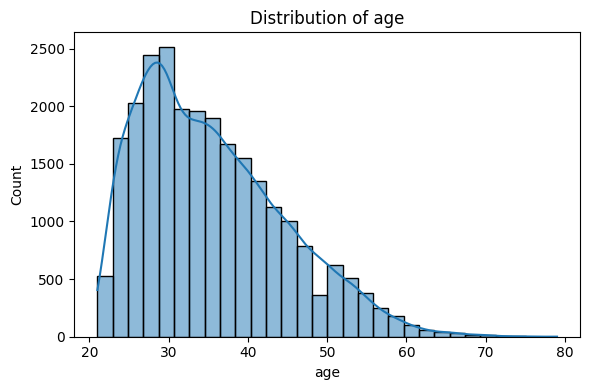

In [ ]:
plot_distribution(df,'age')

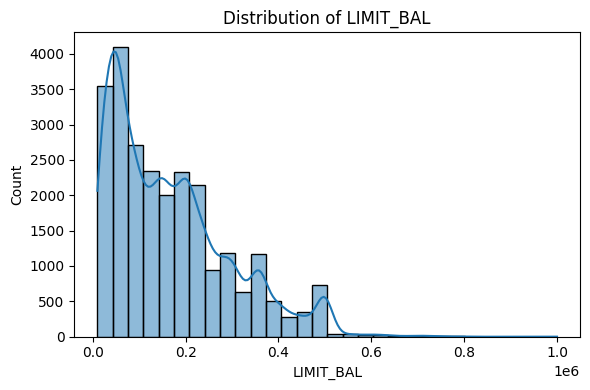

In [ ]:
plot_distribution(df,'LIMIT_BAL')

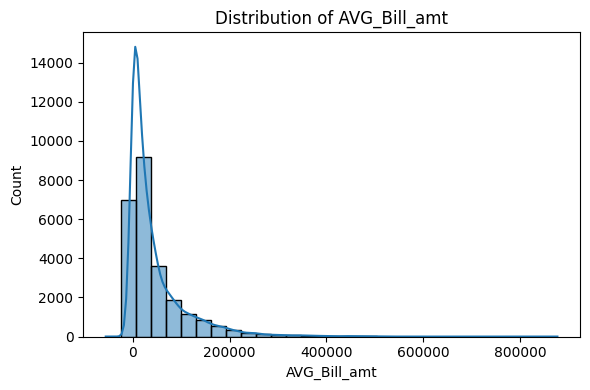

In [ ]:
plot_distribution(df,'AVG_Bill_amt')

we observe that the age,limit balance , avg bill amount are rightly skewed so the log transformation so that the distribution becomes normal distribution.

But since the alogrithms which we are going to apply are XGBoost , random forest ,light GBM , decision tree which are mostly tree based algorithm (Bayesian distribution assumption not present)so there will be not much impact on the accuracy so we avoid doing log tranformation to make the distribution normal

In [ ]:
def engineer_financial_features(df):
    # CREDIT UTILIZATION RATIO (avg bill / credit limit)
    bill_cols = ['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
                 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']
    df['avg_bill_amt'] = df[bill_cols].mean(axis=1)
    if 'LIMIT_BAL' in df.columns:
        df['credit_utilization_ratio'] = df['avg_bill_amt'] / df['LIMIT_BAL']
    elif 'limit_bal' in df.columns:
        df['credit_utilization_ratio'] = df['avg_bill_amt'] / df['limit_bal']
    else:
        print("Warning: 'LIMIT_BAL' or 'limit_bal' column not found for credit utilization ratio.")
        df['credit_utilization_ratio'] = np.nan # Or handle as appropriate

    # MAX DELINQUENCY STREAK (longest streak of consecutive months with late payment)
    def max_streak(row):
        streak = 0
        max_streak = 0
        for val in row:
            # Check if the value is numeric before comparison (for robustness)
            if pd.api.types.is_numeric_dtype(type(val)) and val > 0:
                streak += 1
                max_streak = max(max_streak, streak)
            else:
                streak = 0
        return max_streak

    pay_cols = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL',
                'PAY_JUN', 'PAY_MAY', 'PAY_APR']
    df['max_delinquency_streak'] = df[pay_cols].apply(max_streak, axis=1)
    return df

The featurea like credit utilization Ration which is the ration of avg bill to the credit limit and max deliquency streak are important in deciding the default of the next which i have added to the dataframe for more precise predictions

In [ ]:
engineer_financial_features(df).head()

,marriage,sex,education,LIMIT_BAL,age,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default,avg_bill_amt,credit_utilization_ratio,max_delinquency_streak
0,2,0,2,60000,25,2,2,2,0,0,...,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0,41511.498333,0.691858,3
1,2,1,1,290000,24,0,0,-2,-2,-1,...,0.00,2700.10,0.00,1349.72,2534.50,0.27,0,2535.076667,0.008742,0
2,1,0,2,180000,63,0,0,0,0,0,...,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0,50421.683333,0.280120,0
3,1,1,2,210000,43,0,0,0,0,0,...,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0,86229.755000,0.410618,0
4,2,0,1,280000,32,-2,-2,-2,-2,-2,...,45027.78,2100.09,0.01,0.27,11814.33,0.72,0,11814.253333,0.042194,0


In [ ]:
cols = df.columns.tolist()
cols.remove('next_month_default')
cols.append('next_month_default')
df = df[cols]

In [ ]:
df.head()

,marriage,sex,education,LIMIT_BAL,age,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,AVG_Bill_amt,PAY_TO_BILL_ratio,avg_bill_amt,credit_utilization_ratio,max_delinquency_streak,next_month_default
0,2,0,2,60000,25,2,2,2,0,0,...,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,41511.498333,0.691858,3,0
1,2,1,1,290000,24,0,0,-2,-2,-1,...,0.00,2700.10,0.00,1349.72,2534.50,0.27,2535.076667,0.008742,0,0
2,1,0,2,180000,63,0,0,0,0,0,...,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,50421.683333,0.280120,0,0
3,1,1,2,210000,43,0,0,0,0,0,...,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,86229.755000,0.410618,0,0
4,2,0,1,280000,32,-2,-2,-2,-2,-2,...,45027.78,2100.09,0.01,0.27,11814.33,0.72,11814.253333,0.042194,0,0


# Basic EDA

1. Creating a vertical bar plot that shows the distribution of unique values in the 'AGE' column of the DataFrame df.

 Each bar represents a unique age value, and the height of the bar represents the count of occurrences of that age in the DataFrame.
 in the same graph i have also tried to visualize the no of defaulters and non defaulters at each age



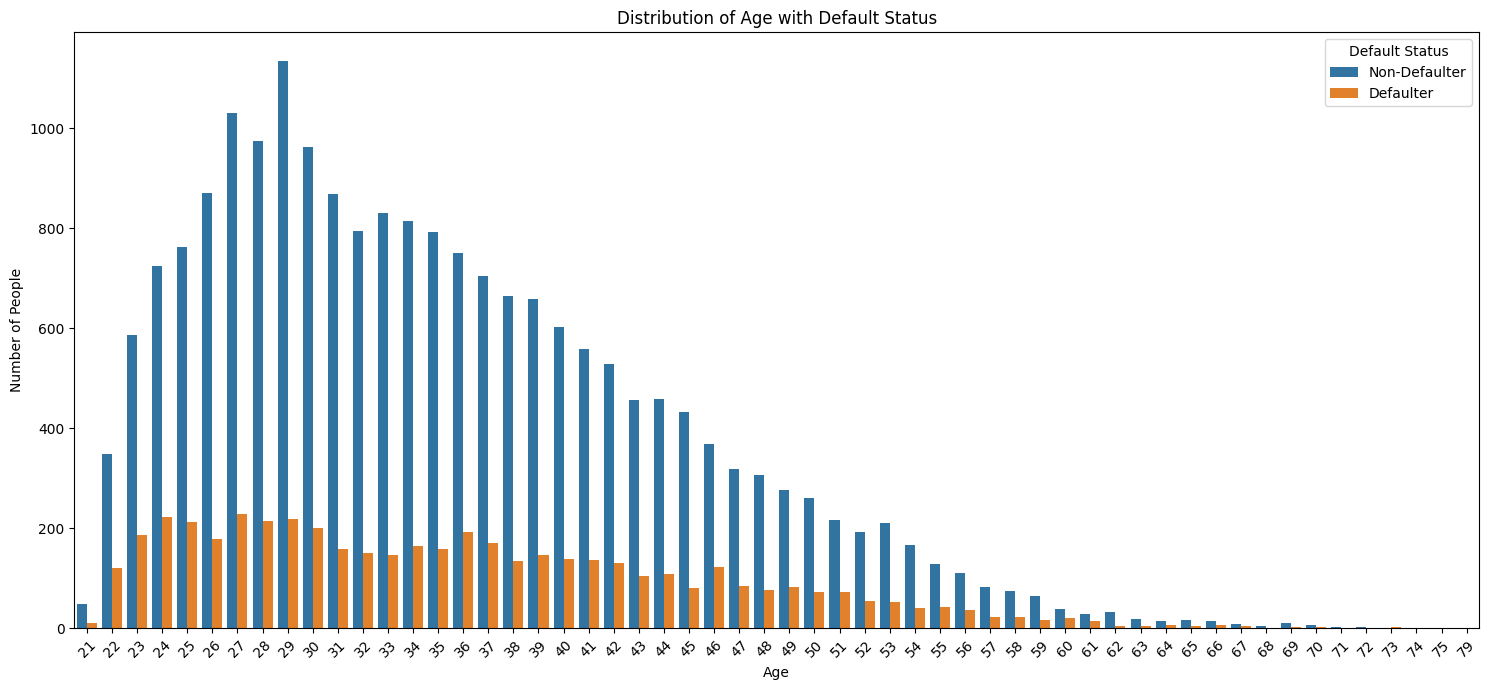

In [ ]:
# Group by age and default status
age_default = df.groupby(['age', 'next_month_default']).size().reset_index(name='count')

# Pivot for grouped bar chart
pivot_df = age_default.pivot(index='age', columns='next_month_default', values='count').fillna(0)
pivot_df.columns = ['Non-Defaulter', 'Defaulter']  # Assuming 0 = non-default, 1 = default
pivot_df = pivot_df.reset_index()

# Plot
plt.figure(figsize=(15, 7))
pivot_df_melted = pivot_df.melt(id_vars='age', value_vars=['Non-Defaulter', 'Defaulter'], var_name='Status', value_name='Count')

sns.barplot(data=pivot_df_melted, x='age', y='Count', hue='Status')
plt.title("Distribution of Age with Default Status")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.xticks(rotation=45)
plt.legend(title="Default Status")
plt.tight_layout()
plt.show()

we observe that most the of the credit users lie between the age 24 to 40 which are mostly the working youth.
we can also observe that most of the defaulters are lying in the range 23 to 44 and as the age increase further the no of defaulters also decreases indicating the timely payment by the old people compared to the youth

2.  The amount the defaulters and non-defaulters

In [ ]:
df['next_month_default'].value_counts()

,count
next_month_default,
0,20337
1,4784


<ipython-input-31-1854180481>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Default', 'Default'])


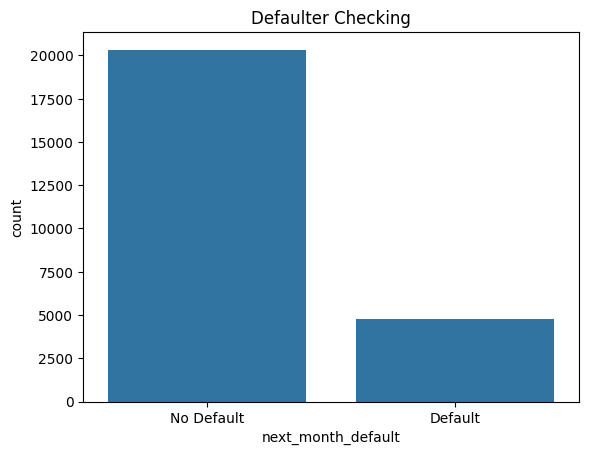

In [ ]:
plt.title('Defaulter Checking')
ax = sns.countplot(x='next_month_default', data=df)

# Set custom x-axis tick labels
ax.set_xticklabels(['No Default', 'Default'])

plt.show()


3. Checking the no of females and males

In [ ]:
df['sex'].value_counts()

,count
sex,
1,15191
0,9930


<ipython-input-33-3912892565>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Female', 'Male'])


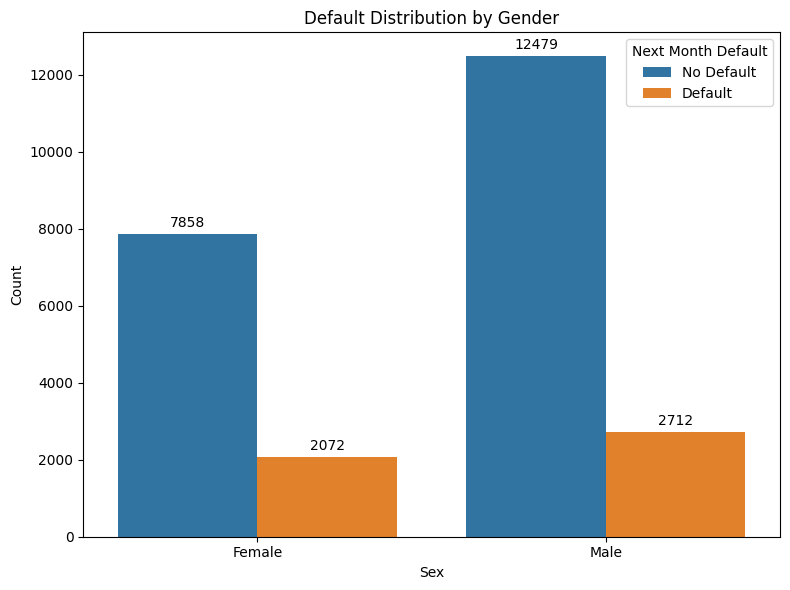

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sex', hue='next_month_default', data=df)

# Custom x-axis tick labels for 'sex'
ax.set_xticklabels(['Female', 'Male'])

# Custom legend labels for 'next_month_default'
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No Default', 'Default'], title='Next Month Default')

# Add exact count labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Titles and axis labels
plt.title('Default Distribution by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


There are more male credit card users than female users.

More males defaulted on their payments than females, but this is because the number of male users is higher.

When we compare the percentage of people who defaulted, a higher percentage of females defaulted compared to males.

Overall, most people — both male and female — did not default on their credit card payments

<ipython-input-34-947614235>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Grad School', 'University', 'High School', 'Others'])


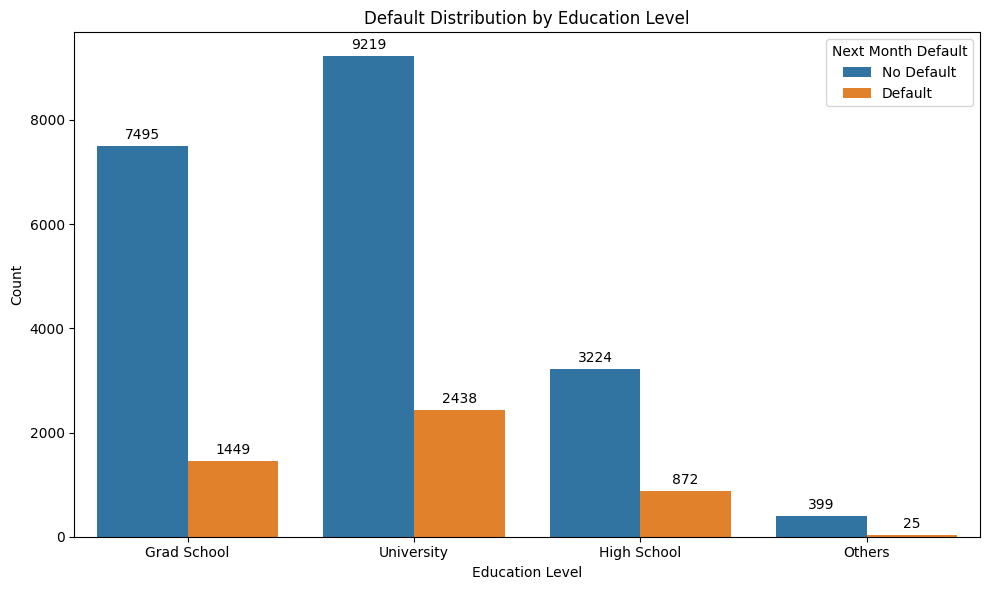

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot countplot with hue
ax = sns.countplot(x='education', hue='next_month_default', data=df)

# Custom x-axis tick labels for education levels
ax.set_xticklabels(['Grad School', 'University', 'High School', 'Others'])

# Custom legend labels for next_month_default
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No Default', 'Default'], title='Next Month Default')

# Add count labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Axis and title settings
plt.title('Default Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

University graduates show the highest number of defaults, possibly due to their larger representation in the dataset.

All education levels show more non-defaulters than defaulters, but the proportion of defaults appears slightly higher among University and High School groups.

<ipython-input-35-2270395229>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Married', 'Single', 'Others'])


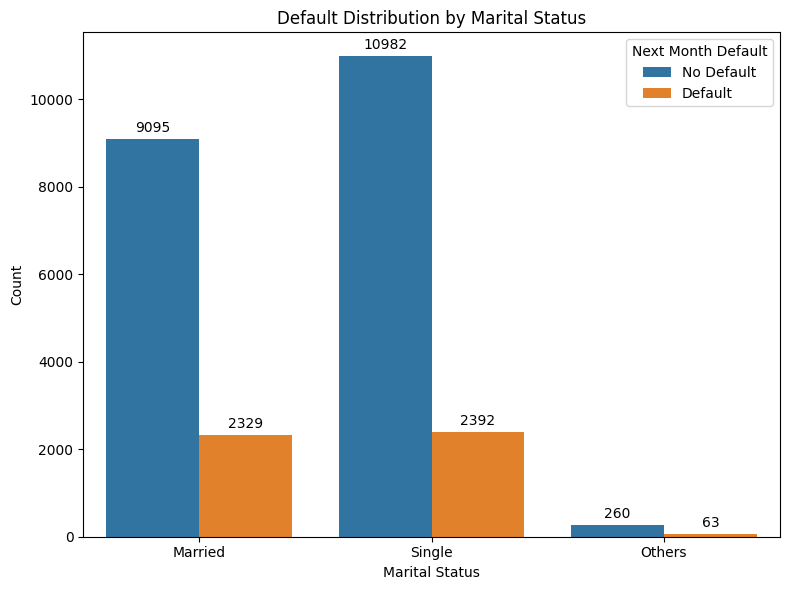

In [ ]:
# Set up the figure
plt.figure(figsize=(8, 6))

# Create the countplot
ax = sns.countplot(x='marriage', hue='next_month_default', data=df)

# Set custom x-tick labels
ax.set_xticklabels(['Married', 'Single', 'Others'])

# Set custom legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No Default', 'Default'], title='Next Month Default')

# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Set plot titles and labels
plt.title('Default Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Both married and single individuals have similar default counts, despite singles having slightly more credit users overall.

The "Others" category shows very few users and defaults, making it less significant for analysis.

In [ ]:
df.LIMIT_BAL.describe()

,LIMIT_BAL
count,25121.000000
mean,168358.823295
std,129866.750911
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,240000.000000
max,1000000.000000


<ipython-input-37-3005648998>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='LIMIT_BAL', hue='next_month_default', shade=True, linewidth=2)


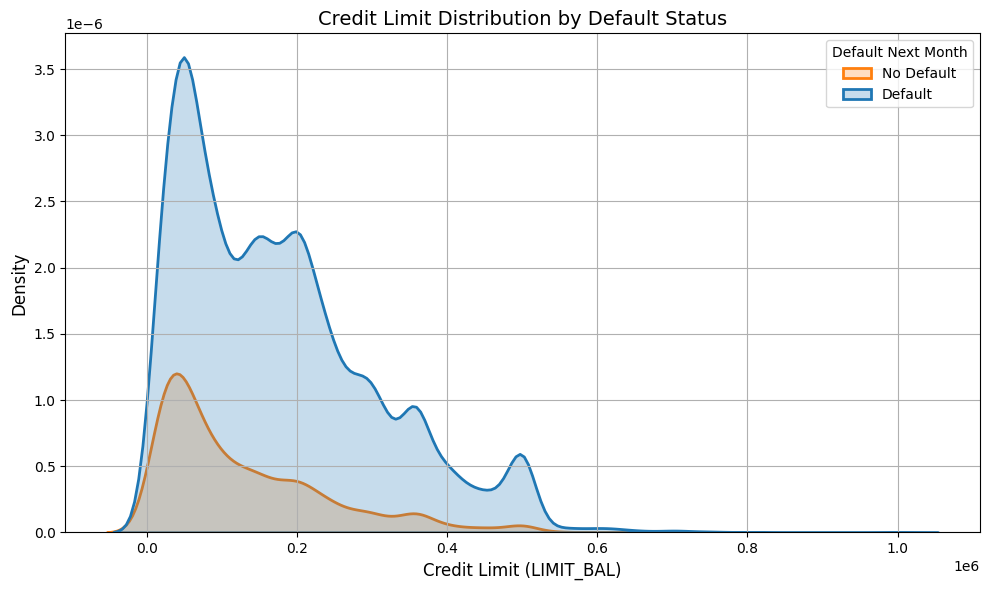

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='LIMIT_BAL', hue='next_month_default', shade=True, linewidth=2)

plt.title('Credit Limit Distribution by Default Status', fontsize=14)
plt.xlabel('Credit Limit (LIMIT_BAL)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Default Next Month', labels=['No Default', 'Default'])
plt.grid(True)
plt.tight_layout()
plt.show()

The very high value of standard deviation has been further investigated. As can be seen, most of defaults are for credit limits 0-100,000 (and density for this interval is larger for defaults than for non-defaults).

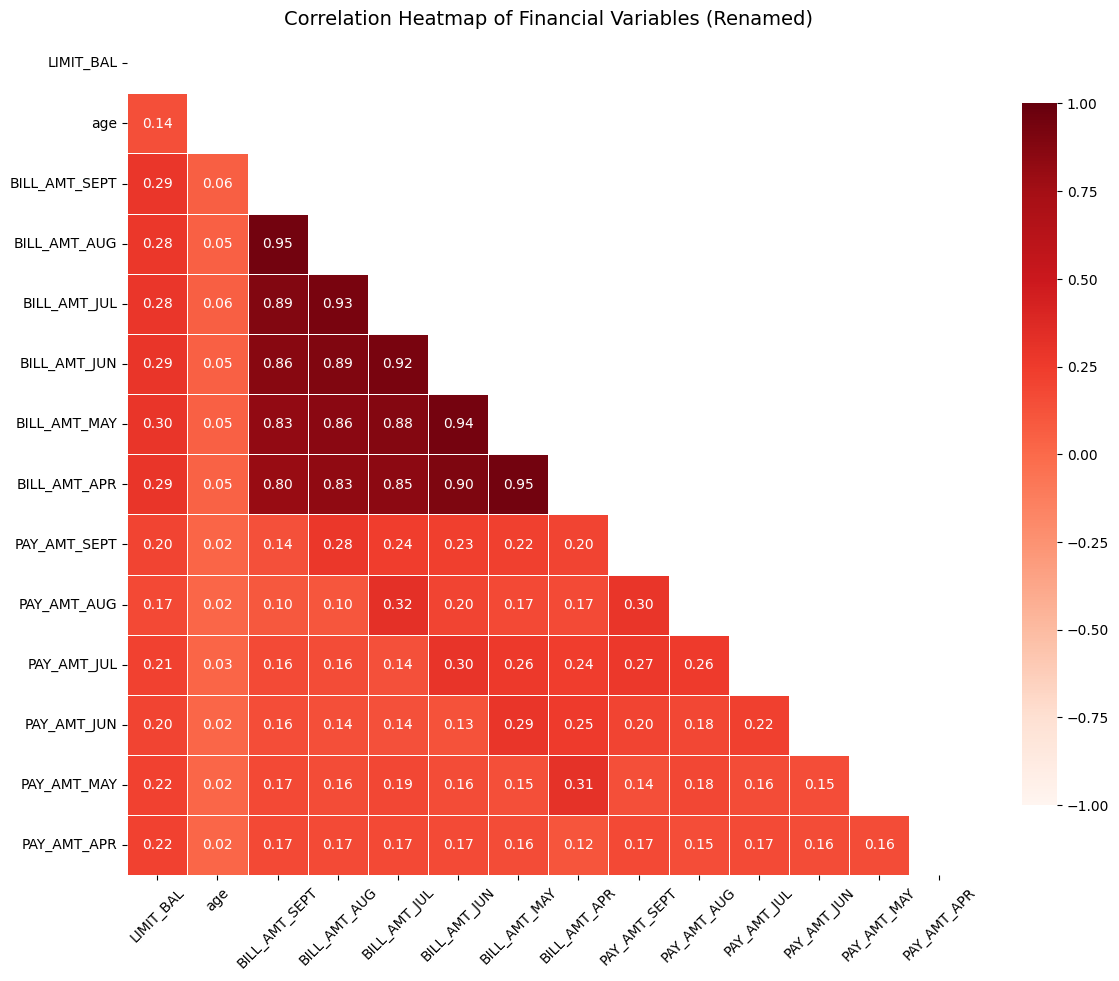

In [ ]:
cols = [
    'LIMIT_BAL', 'age',
    'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
    'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
    'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
    'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR'
]

# Calculate the correlation matrix
corr = df[cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Reds', square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1)

plt.title('Correlation Heatmap of Financial Variables (Renamed)', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

1. BILL_AMT_SEPT vs BILL_AMT_AUG (Correlation ≈ 0.95):
This extremely strong positive correlation suggests that the total bill amount from one month to the next remains almost unchanged for many customers. It indicates stable spending behavior, where customers maintain similar purchasing or credit usage habits across months.

2. BILL_AMT_JUL vs BILL_AMT_AUG (Correlation ≈ 0.93):
Like the previous point, this further confirms the temporal stability in billing amounts. High correlation between adjacent months points to predictable financial activity, which can be useful for modeling risk.

3. BILL_AMT_APR vs BILL_AMT_MAY (Correlation ≈ 0.95):
Another pair showing very strong correlation — this reinforces the trend that customers generally do not exhibit erratic spikes or drops in billing, making the bill amount series a reliable input for behavior-based credit scoring models.

The plot shows monthly billing amounts for defaulters and non-defaulters, helping compare trends and differences across months.


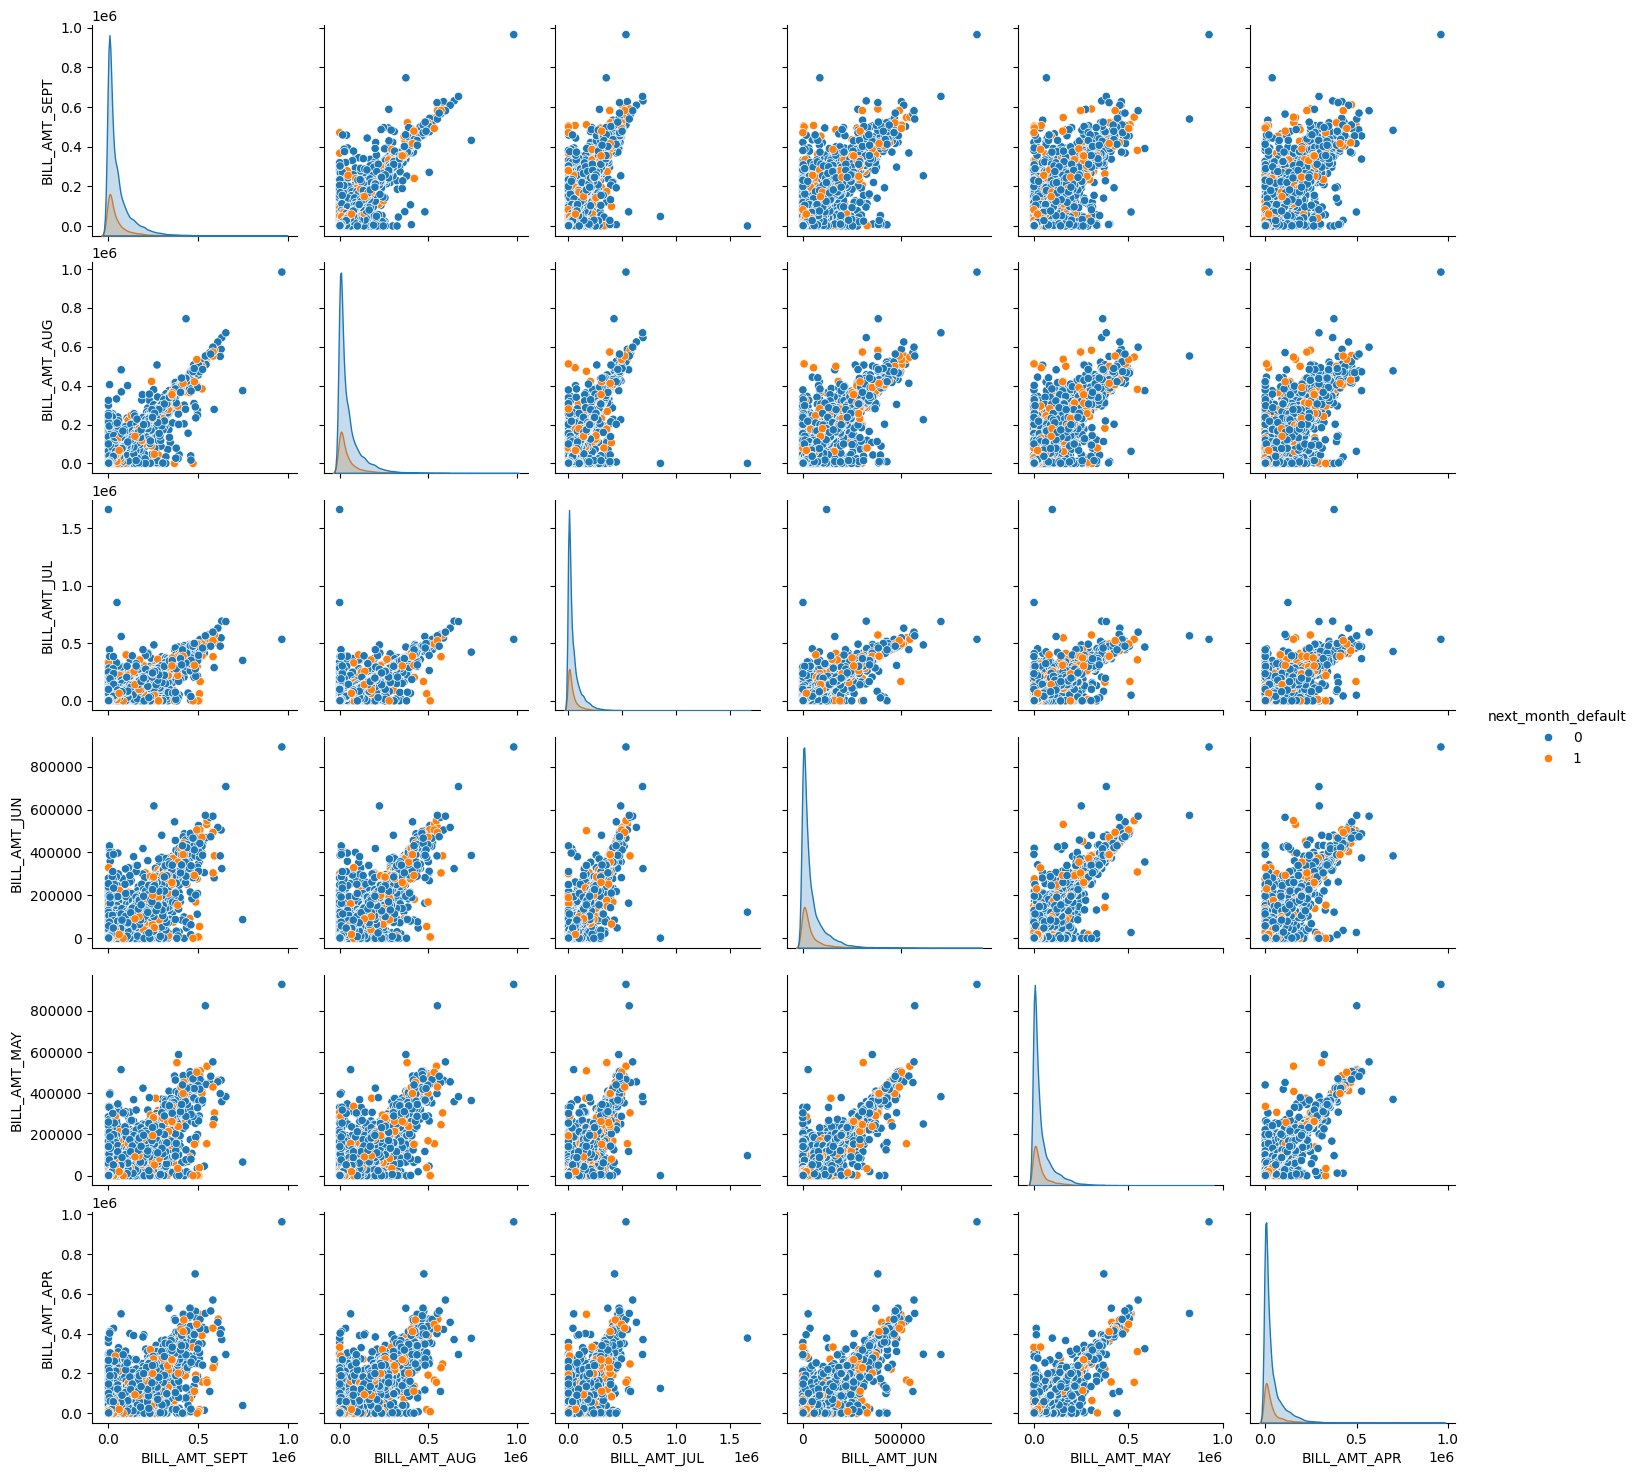

In [ ]:
bill_amnt_df = df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR','next_month_default']]
sns.pairplot(data = bill_amnt_df,hue='next_month_default')
print("The plot shows monthly billing amounts for defaulters and non-defaulters, helping compare trends and differences across months.")

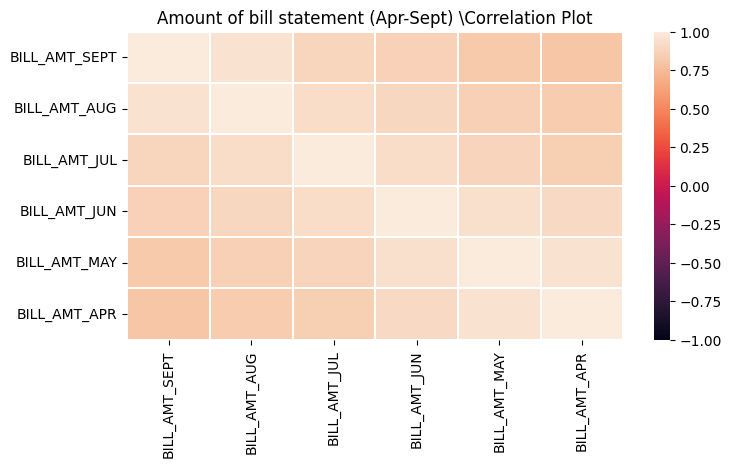

In [ ]:
var = ['BILL_AMT_SEPT','BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY','BILL_AMT_APR']
plt.figure(figsize = (8,4))
plt.title('Amount of bill statement (Apr-Sept) \Correlation Plot')
corr = df[var].corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, linewidths=.1, vmin=-1, vmax=1)
plt.show()

This heatmap displays correlations between monthly bill amounts (April-September). Warmer colors (red) indicate negative correlations, cooler colors (salmon) show positive correlations, and white signifies no correlation.

In above graph we can see that mostly all values have positive correlation with each other

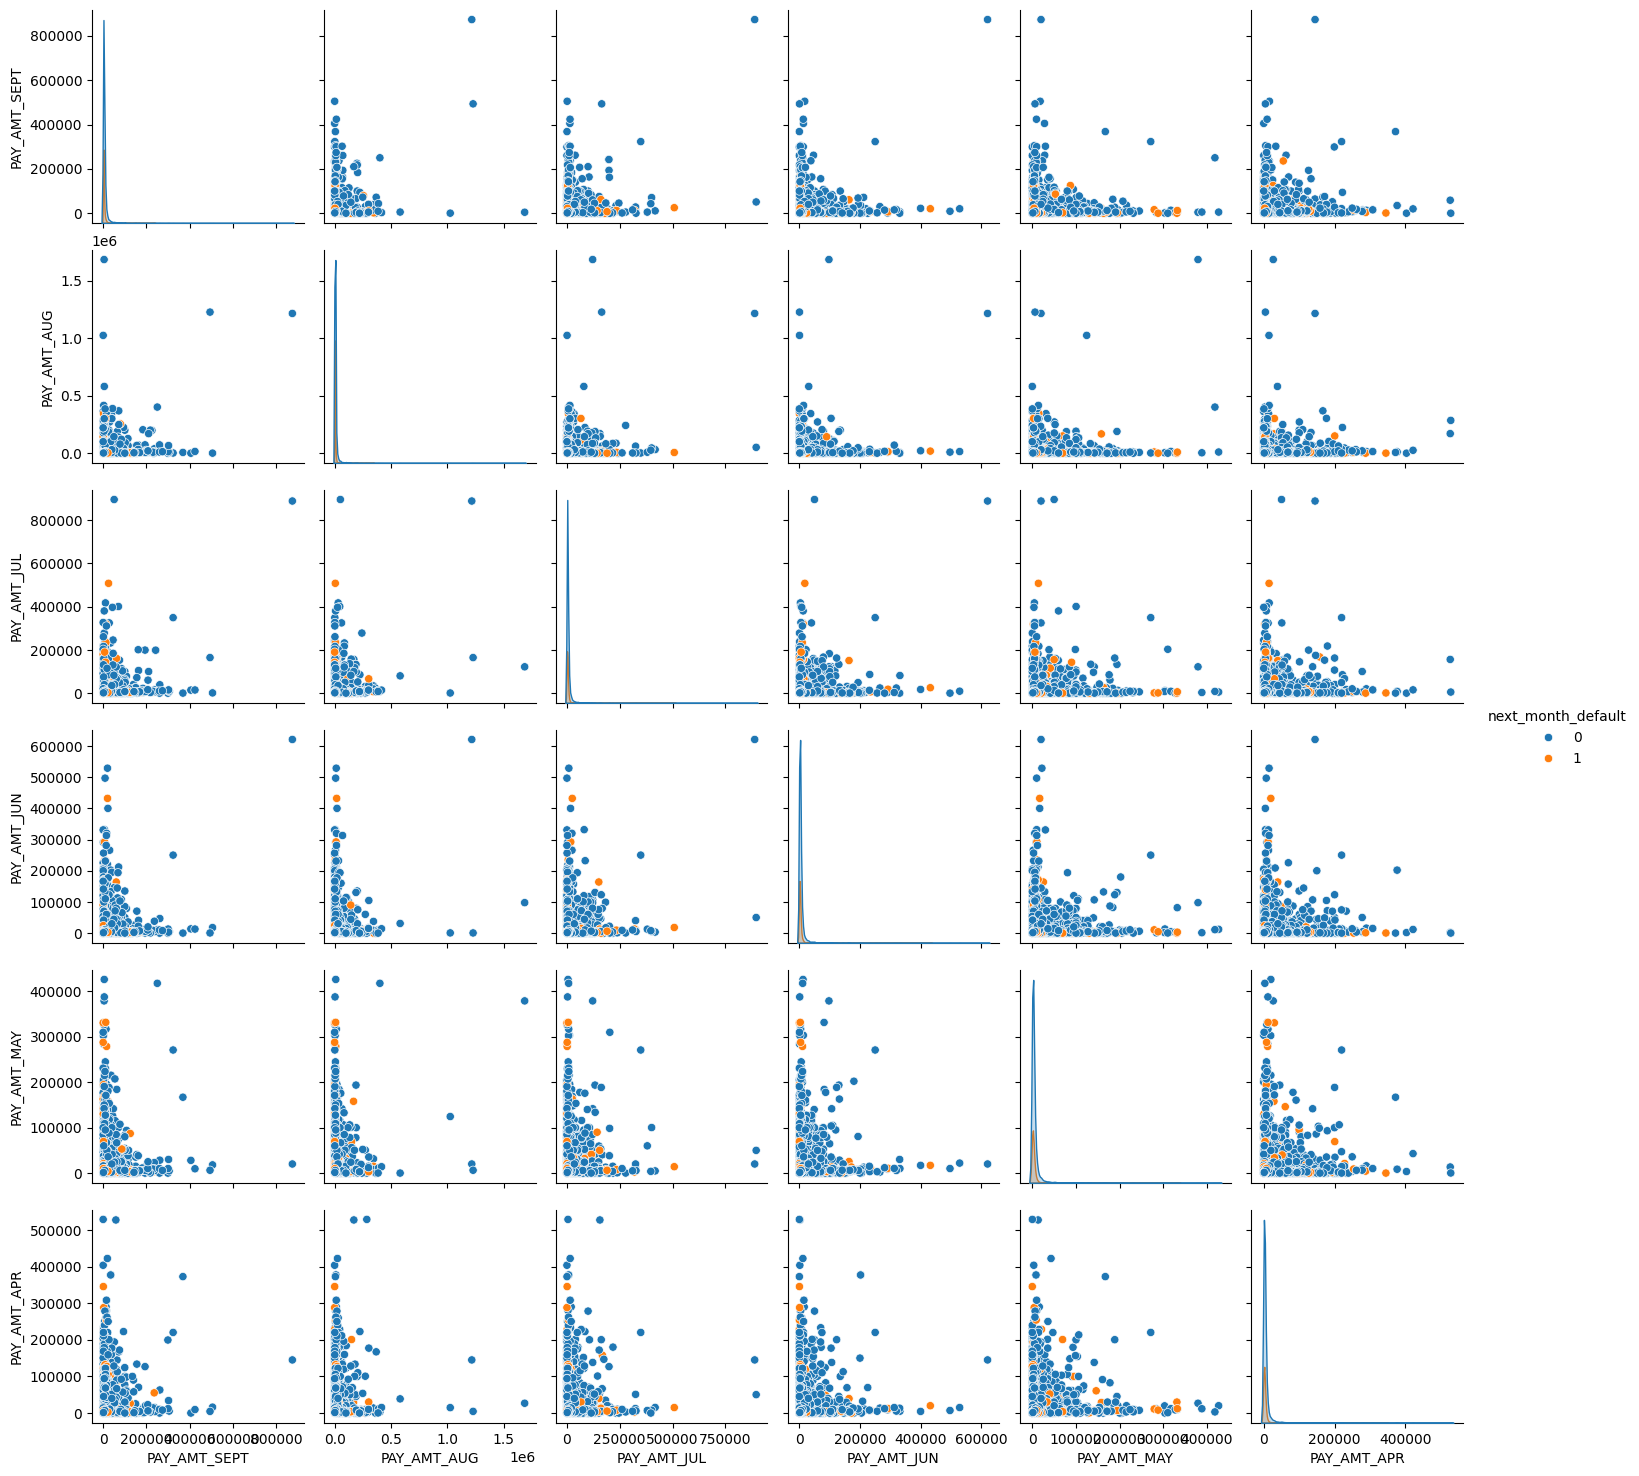

In [ ]:
pay_amnt_df = df[['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN',	'PAY_AMT_MAY','PAY_AMT_APR','next_month_default']]
sns.pairplot(data = pay_amnt_df, hue='next_month_default')

Here we can see the payment defaulters and non-defaulters are shown for each month. This can help you visually inspect how payment amounts in different months relate to each other and how they might differ for those who default on payments and those who don't.

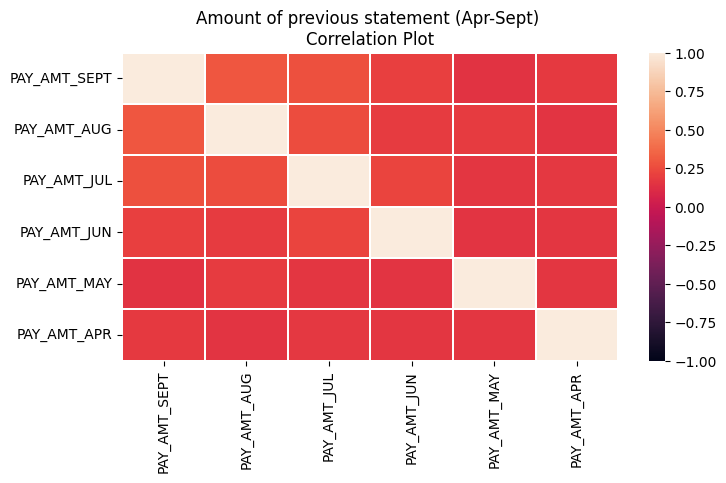

In [ ]:
var = ['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL','PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']
plt.figure(figsize = (8,4))
plt.title('Amount of previous statement (Apr-Sept) \nCorrelation Plot')
corr = df[var].corr()

sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, linewidths=.1, vmin=-1, vmax=1)
plt.show()

The count plots visualize how payment behavior (on-time vs. delayed) each month influences default likelihood. They reveal that timely payments correlate with lower default rates, while late payments increase risk

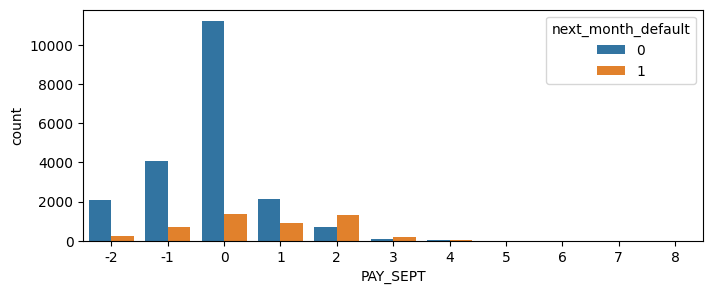

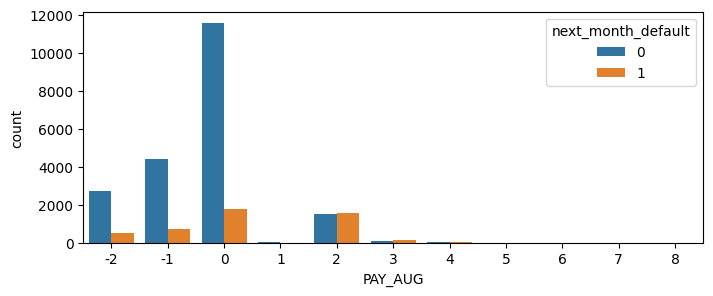

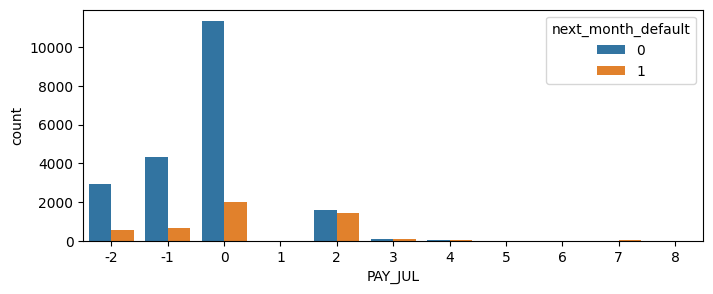

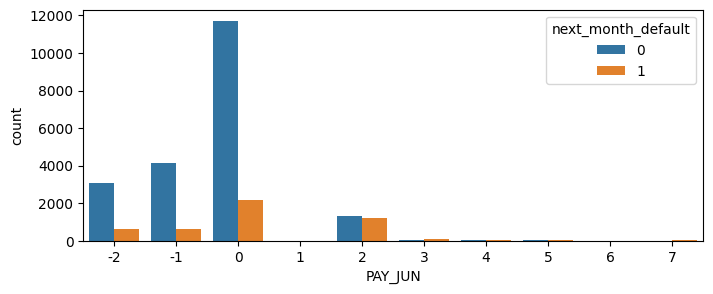

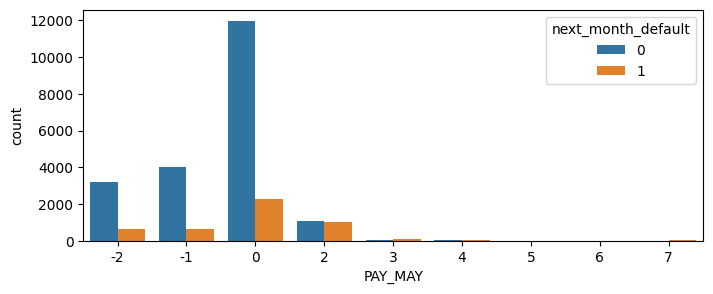

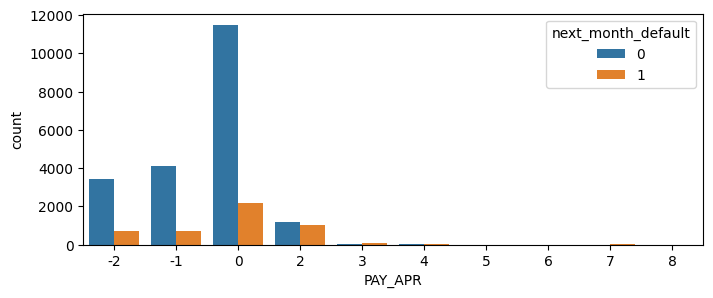

In [ ]:
pay_df=['PAY_SEPT','PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
for col in pay_df:
  plt.figure(figsize=(8,3))
  sns.countplot(x = col, hue = 'next_month_default', data = df)

from above graphs it can be seen as if the payments are done on time then likeliness of being defaulter is less.

On-time September payments correlate with lower defaults; delays increase risk significantly

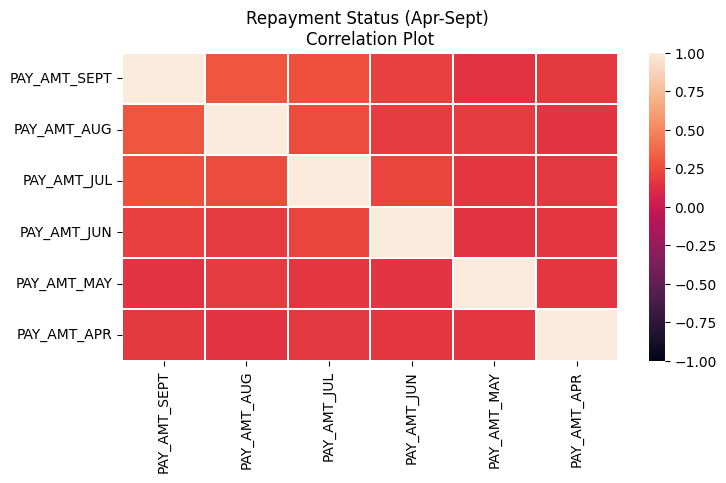

In [ ]:
ar = ['PAY_SEPT','PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
plt.figure(figsize = (8,4))
plt.title('Repayment Status (Apr-Sept) \nCorrelation Plot')
corr = df[var].corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, linewidths=.1, vmin=-1, vmax=1)
plt.show()

Null Hypothesis:- All variable depends on customers next month payment

Alternate Hypothesis:- All variables do not depend on customers next month payment.

Two sample t-test to check variables are significant or not

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Explicitly exclude categorical columns (even if they are numeric)
categorical_to_exclude = ['sex', 'education', 'marriage', 'Customer Id', 'next_month_default']  # Adjust as needed
numerical_cols = [col for col in numerical_cols if col not in categorical_to_exclude]

df_scaled = df.copy()
scaler = StandardScaler()

# Scale numerical columns and replace them in the copied DataFrame
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Verify the result
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)
df_scaled

,marriage,sex,education,LIMIT_BAL,age,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,AVG_Bill_amt,PAY_TO_BILL_ratio,avg_bill_amt,credit_utilization_ratio,max_delinquency_streak,next_month_default
0,2,0,2,-0.834401,-1.137701,2,2,2,0,0,...,-0.233336,-0.190451,-0.215480,-0.209878,-0.053780,-0.065640,-0.054384,0.919474,1.536652,0
1,2,1,1,0.936680,-1.246695,0,0,-2,-2,-1,...,-0.297251,-0.135583,-0.310619,-0.218290,-0.673672,-0.018191,-0.674382,-1.036499,-0.511031,0
2,1,0,2,0.089641,3.004071,0,0,0,0,0,...,-0.193304,-0.179296,-0.188654,-0.181961,0.087933,-0.063662,0.087351,-0.259458,-0.511031,0
3,1,1,2,0.320652,0.824191,0,0,0,0,0,...,-0.105738,-0.136591,-0.136582,-0.132093,0.657418,-0.063662,0.656950,0.114196,-0.511031,0
4,2,0,1,0.859677,-0.374743,-2,-2,-2,-2,-2,...,2.238698,-0.173065,-0.310618,-0.293706,-0.526085,0.070774,-0.526778,-0.940715,-0.511031,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,1,1,2,-0.603391,-0.265749,0,0,0,0,2,...,0.153312,0.029818,-0.075950,-0.118906,0.595121,-0.061685,0.594647,1.557221,0.854091,0
25243,1,0,2,-0.834401,1.478155,0,0,0,0,0,...,-0.156388,-0.147328,-0.056611,-0.148181,-0.056004,-0.043892,-0.056610,0.912795,-0.511031,1
25244,2,0,1,-0.372380,-0.483737,-1,-1,-1,-1,-1,...,-0.267228,-0.047129,0.313102,0.103077,-0.665126,0.187417,-0.665847,-0.988238,-0.511031,1
25245,1,1,4,1.706715,0.497209,0,0,0,0,0,...,0.015023,0.041345,0.060990,0.087318,2.423552,-0.065640,2.423405,0.386853,-0.511031,0


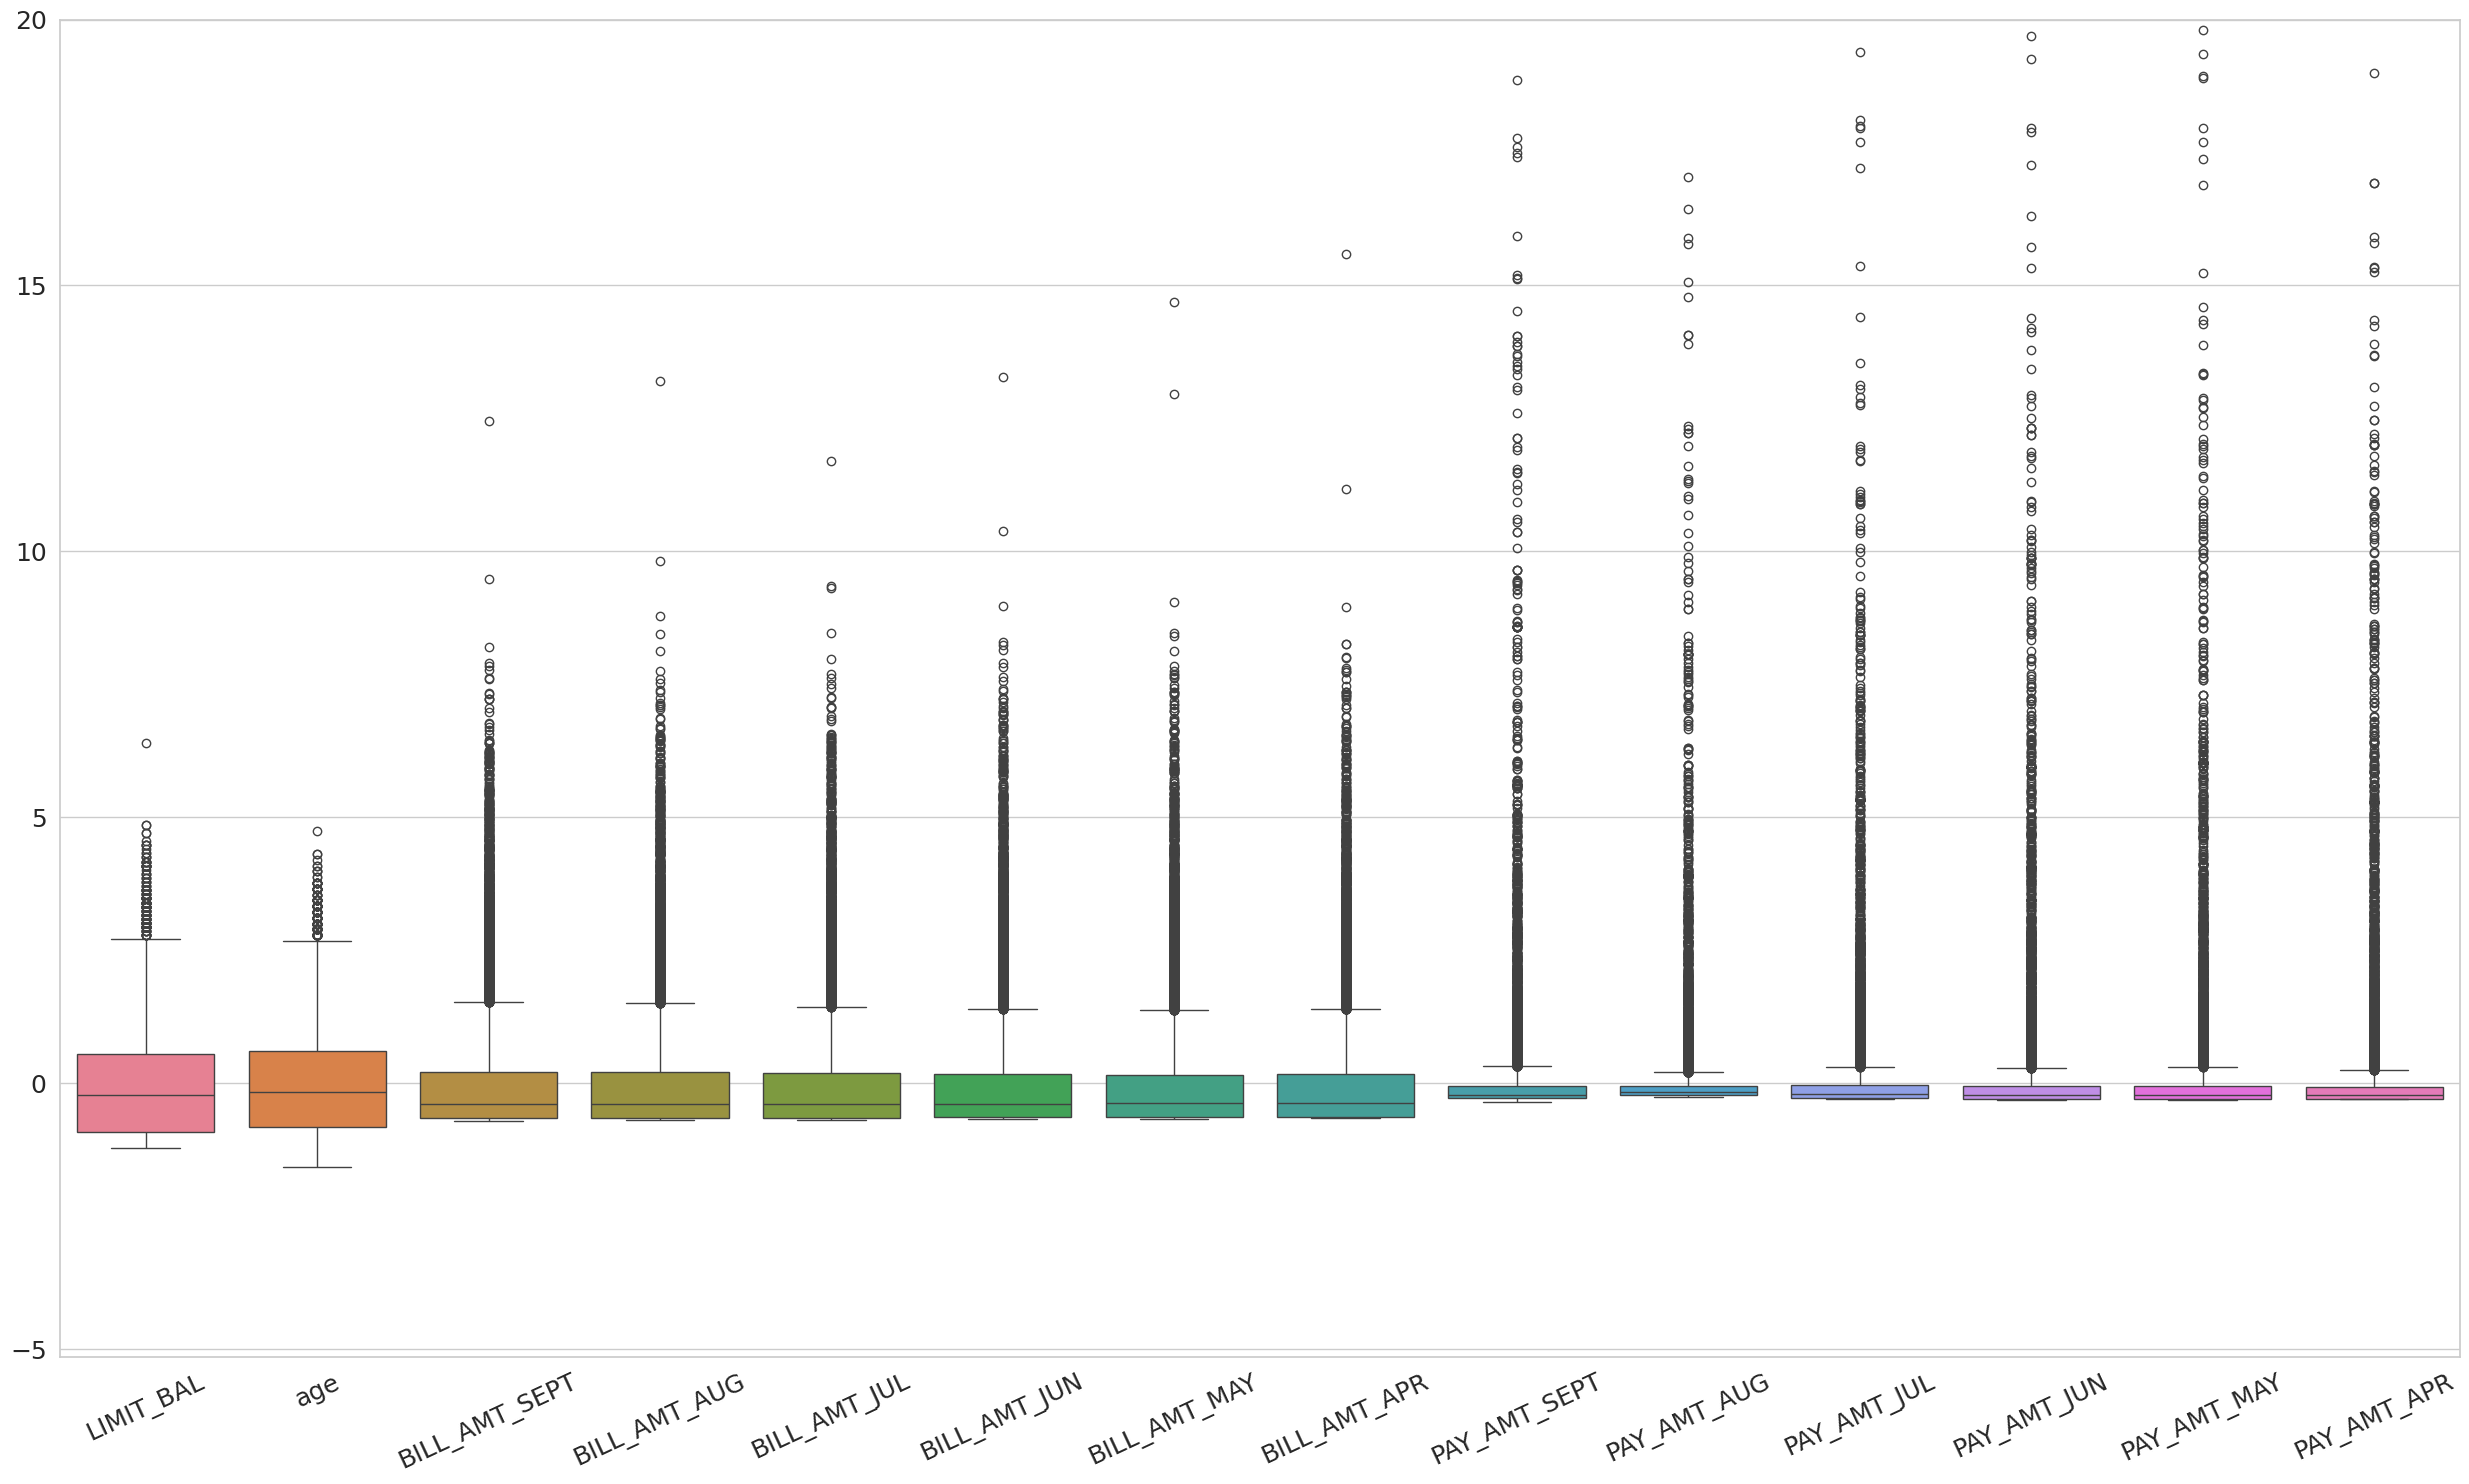

In [ ]:
cols = ['LIMIT_BAL','age','BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
        'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
        'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
        'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']

plt.figure(figsize=(25,15))
sns.set(style="whitegrid")

# Create boxplot
sns.boxplot(data=df_scaled[cols])

# Customize axes
plt.xticks(np.arange(len(cols)), labels=cols, rotation=25, fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(top=20)  # <-- This sets the upper limit of y-axis to 20

plt.tight_layout()
plt.savefig('Fig - Boxplot Std Scaler.png', dpi=300, bbox_inches='tight')
plt.show()

Outliers Summary Before Capping:
               Outlier Count  Percentage
PAY_AMT_JUN             2534   10.087178
PAY_AMT_APR             2494    9.927949
PAY_AMT_MAY             2486    9.896103
PAY_AMT_AUG             2357    9.382588
PAY_AMT_SEPT            2294    9.131802
BILL_AMT_MAY            2270    9.036264
BILL_AMT_APR            2238    8.908881
BILL_AMT_JUN            2191    8.721787
PAY_AMT_JUL             2165    8.618287
BILL_AMT_JUL            2053    8.172445
BILL_AMT_SEPT           1978    7.873890
BILL_AMT_AUG            1977    7.869910
age                      217    0.863819
LIMIT_BAL                148    0.589149


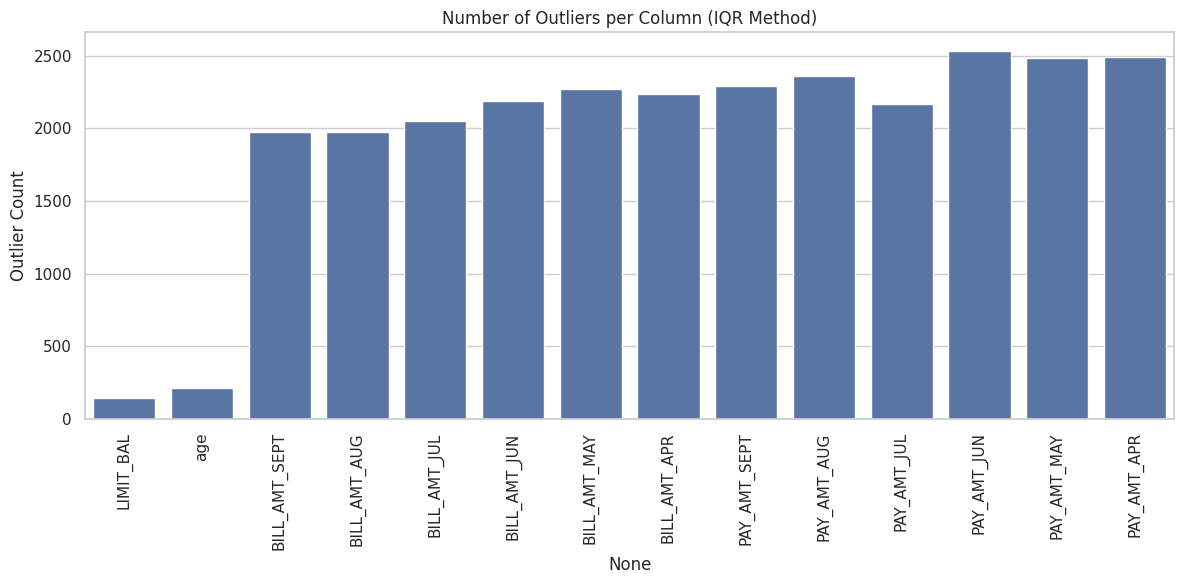

In [ ]:

# Define numerical columns (using your renamed columns)
cols_to_check = [
    'LIMIT_BAL', 'age',
    'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
    'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
    'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
    'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR'
]

# Calculate and display outliers for each column
outliers_count = {}
for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count[col] = len(outliers)

# Convert to DataFrame for better visualization
outliers_df = pd.DataFrame.from_dict(outliers_count,
                                    orient='index',
                                    columns=['Outlier Count'])
outliers_df['Percentage'] = (outliers_df['Outlier Count'] / len(df)) * 100

print("Outliers Summary Before Capping:")
print(outliers_df.sort_values('Outlier Count', ascending=False))

# Optional: Visualize outlier counts
plt.figure(figsize=(12, 6))
sns.barplot(x=outliers_df.index, y=outliers_df['Outlier Count'])
plt.xticks(rotation=90)
plt.title('Number of Outliers per Column (IQR Method)')
plt.tight_layout()
plt.show()

As we can see that the percentage of the outliers according the IQR method is a very large number in this case if we do the capping using the IQR method most of the information of the data is getting lost so i want to go for winsorization where only the most extreme values are capped (e.g., top/bottom 1% instead of 1.5×IQR):

In [ ]:
from scipy.stats.mstats import winsorize

# Columns to winsorize (using your renamed columns)
cols_to_winsorize = [
    'LIMIT_BAL', 'age',
    'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
    'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
    'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
    'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR'
]

# Create a copy of the DataFrame
df_winsorized = df.copy()

# Apply 1% winsorization to each column
for col in cols_to_winsorize:
    df_winsorized[col] = winsorize(df[col], limits=[0.01, 0.01])

# Verify the result
print("Original min/max vs Winsorized min/max:")
for col in cols_to_winsorize[:3]:  # Print first 3 columns for demonstration
    print(f"\n{col}:")
    print(f"Original: min={df[col].min():.2f}, max={df[col].max():.2f}")
    print(f"Winsorized: min={df_winsorized[col].min():.2f}, max={df_winsorized[col].max():.2f}")

Original min/max vs Winsorized min/max:

LIMIT_BAL:
Original: min=10000.00, max=1000000.00
Winsorized: min=10000.00, max=500000.00

age:
Original: min=21.00, max=79.00
Winsorized: min=22.00, max=60.00

BILL_AMT_SEPT:
Original: min=0.00, max=964511.16
Winsorized: min=0.00, max=348937.58


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


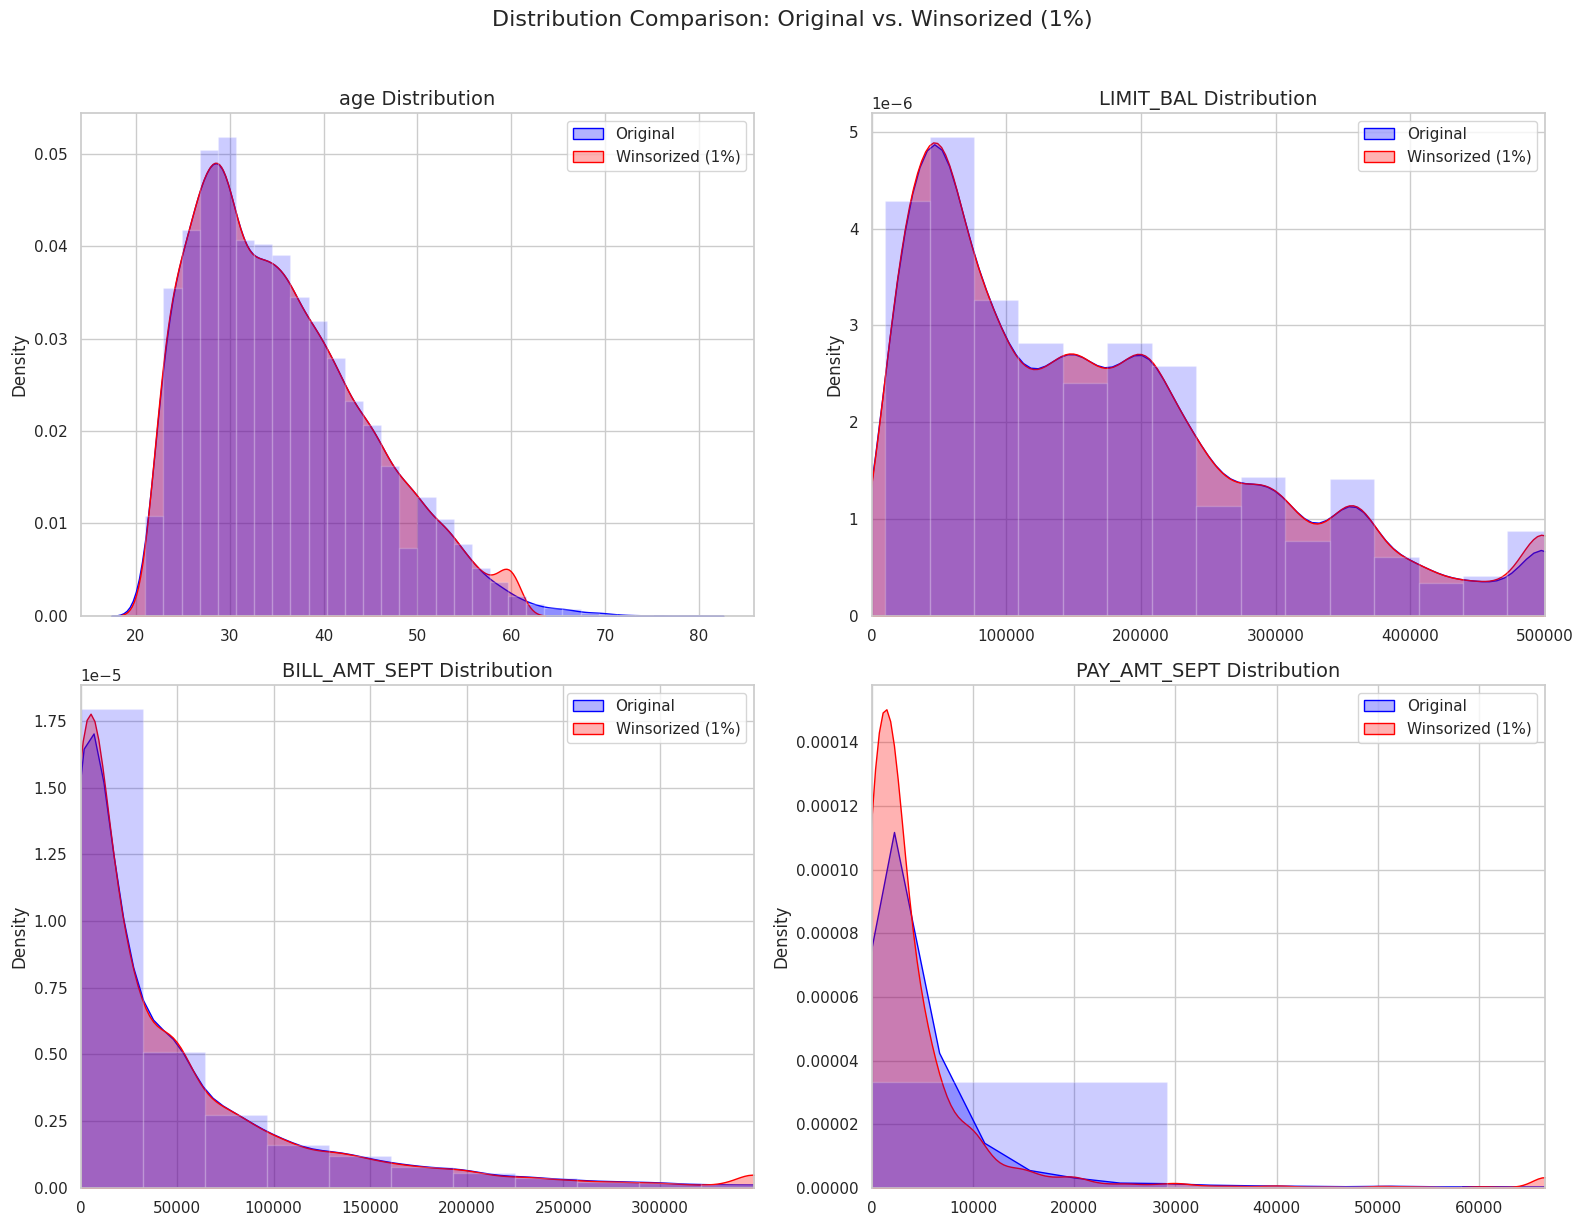

In [ ]:

# Columns to visualize
cols_to_plot = ['age', 'LIMIT_BAL', 'BILL_AMT_SEPT', 'PAY_AMT_SEPT']

# Set up subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.suptitle('Distribution Comparison: Original vs. Winsorized (1%)', y=1.02, fontsize=16)

# Plot distributions
for ax, col in zip(axes.flatten(), cols_to_plot):
    # Original data
    sns.kdeplot(df[col], ax=ax, color='blue', label='Original', fill=True, alpha=0.3)
    # Winsorized data
    sns.kdeplot(df_winsorized[col], ax=ax, color='red', label='Winsorized (1%)', fill=True, alpha=0.3)

    # Add histogram for original data (transparent)
    ax.hist(df[col], bins=30, color='blue', alpha=0.2, density=True)

    ax.set_title(f'{col} Distribution', fontsize=14)
    ax.set_xlabel('')
    ax.legend()

    # Adjust x-axis limits for better comparison
    if col == 'LIMIT_BAL':
        ax.set_xlim(0, df_winsorized[col].quantile(0.99))  # Focus on majority range
    elif col in ['BILL_AMT_SEPT', 'PAY_AMT_SEPT']:
        ax.set_xlim(df_winsorized[col].min(), df_winsorized[col].quantile(0.99))

plt.tight_layout()
plt.savefig('distribution_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

Winsorization preserved core distributions while curbing extreme values.

Payment/Bill Amounts: High skewness suggests:

Many customers pay/spend minimally, but a few outliers drive variability.

Capping at 1% retains high-spenders without letting them dominate analysis.

Age/Limit: Minimal winsorization needed → Demographics are naturally bounded.

In [ ]:
df_winsorized.head()

,marriage,sex,education,LIMIT_BAL,age,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,AVG_Bill_amt,PAY_TO_BILL_ratio,avg_bill_amt,credit_utilization_ratio,max_delinquency_streak,next_month_default
0,2,0,2,60000,25,2,2,2,0,0,...,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,41511.498333,0.691858,3,0
1,2,1,1,290000,24,0,0,-2,-2,-1,...,0.00,2700.10,0.00,1349.72,2534.50,0.27,2535.076667,0.008742,0,0
2,1,0,2,180000,60,0,0,0,0,0,...,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,50421.683333,0.280120,0,0
3,1,1,2,210000,43,0,0,0,0,0,...,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,86229.755000,0.410618,0,0
4,2,0,1,280000,32,-2,-2,-2,-2,-2,...,45027.78,2100.09,0.01,0.27,11814.33,0.72,11814.253333,0.042194,0,0


In [ ]:

# Select numerical columns (excluding categorical)
num_cols = df_winsorized.select_dtypes(include=['int64', 'float64']).columns.difference(['sex', 'education', 'marriage', 'Customer Id', 'next_month_default'])

# Scale numerical columns only
df_winsorized_scaled = df_winsorized.copy()
df_winsorized_scaled[num_cols] = StandardScaler().fit_transform(df_winsorized[num_cols])

In [ ]:
df_winsorized_scaled.head()

,marriage,sex,education,LIMIT_BAL,age,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,AVG_Bill_amt,PAY_TO_BILL_ratio,avg_bill_amt,credit_utilization_ratio,max_delinquency_streak,next_month_default
0,2,0,2,-0.843998,-1.149159,2,2,2,0,0,...,-0.362356,-0.261059,-0.297636,-0.277282,-0.053780,-0.065640,-0.054384,0.919474,1.536652,0
1,2,1,1,0.959599,-1.259637,0,0,-2,-2,-1,...,-0.480942,-0.167775,-0.458419,-0.290704,-0.673672,-0.018191,-0.674382,-1.036499,-0.511031,0
2,1,0,2,0.097009,2.717586,0,0,0,0,0,...,-0.288080,-0.242094,-0.252300,-0.232739,0.087933,-0.063662,0.087351,-0.259458,-0.511031,0
3,1,1,2,0.332261,0.839453,0,0,0,0,0,...,-0.125612,-0.169488,-0.164300,-0.153172,0.657418,-0.063662,0.656950,0.114196,-0.511031,0
4,2,0,1,0.881181,-0.375810,-2,-2,-2,-2,-2,...,4.224237,-0.231501,-0.458418,-0.411032,-0.526085,0.070774,-0.526778,-0.940715,-0.511031,0


In [ ]:
df=df_winsorized_scaled

In [ ]:
df.head()

,marriage,sex,education,LIMIT_BAL,age,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,AVG_Bill_amt,PAY_TO_BILL_ratio,avg_bill_amt,credit_utilization_ratio,max_delinquency_streak,next_month_default
0,2,0,2,-0.843998,-1.149159,2,2,2,0,0,...,-0.362356,-0.261059,-0.297636,-0.277282,-0.053780,-0.065640,-0.054384,0.919474,1.536652,0
1,2,1,1,0.959599,-1.259637,0,0,-2,-2,-1,...,-0.480942,-0.167775,-0.458419,-0.290704,-0.673672,-0.018191,-0.674382,-1.036499,-0.511031,0
2,1,0,2,0.097009,2.717586,0,0,0,0,0,...,-0.288080,-0.242094,-0.252300,-0.232739,0.087933,-0.063662,0.087351,-0.259458,-0.511031,0
3,1,1,2,0.332261,0.839453,0,0,0,0,0,...,-0.125612,-0.169488,-0.164300,-0.153172,0.657418,-0.063662,0.656950,0.114196,-0.511031,0
4,2,0,1,0.881181,-0.375810,-2,-2,-2,-2,-2,...,4.224237,-0.231501,-0.458418,-0.411032,-0.526085,0.070774,-0.526778,-0.940715,-0.511031,0


#Inferential Statistics

here we will perform the inferential statistics to keep only those features which are significant in the default and remaining will be dropped later after the p statistic test

In [ ]:
numeric_features = [ 'LIMIT_BAL', 'age', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'next_month_default','avg_bill_amt','credit_utilization_ratio','max_delinquency_streak']
df_tstats=pd.DataFrame()
for eachvariable in numeric_features:
    tstats=stats.ttest_ind(df.loc[df["next_month_default"]== 1,eachvariable],df.loc[df["next_month_default"]==0, eachvariable])
    df_temp=pd.DataFrame([eachvariable, tstats[0], tstats[1]]).T
    df_temp.columns=['Variable Name', 'T-statistic', 'P-Value']
    df_tstats=pd.concat([df_tstats,df_temp], axis=0, ignore_index=True)

df_tstats=df_tstats.sort_values (by ="P-Value").reset_index(drop=True)
df_tstats

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,Variable Name,T-statistic,P-Value
0,max_delinquency_streak,65.219224,0.0
1,next_month_default,inf,0.0
2,PAY_SEPT,52.276888,0.0
3,PAY_AUG,41.407057,0.0
4,PAY_JUL,36.887629,0.0
5,PAY_JUN,33.698397,0.0
6,PAY_MAY,31.784306,0.0
7,PAY_APR,29.146927,0.0
8,LIMIT_BAL,-23.491972,0.0
9,credit_utilization_ratio,17.775591,0.0


Rejected Variables (P-Value > 0.05):BILL_AMT_MAY, and BILL_AMT_APR.
Justification: Their P-values exceed 0.05, indicating no statistically significant difference between defaulters and non-defaulters for these features.

In [ ]:
columns_to_drop=['BILL_AMT_MAY', 'BILL_AMT_APR']
df = df.drop(columns=columns_to_drop)

In [ ]:
df.shape

(25121, 27)

#Applying PCA for dimensionality reduction

 In this case there is no such need for applying the principle component analysis as this is applied when the no of input features is so large that the complexity of the model increase leading to high computation time
 So there is no need for applying the PCA in this case as the no of features are around 27 which is not too large

#TrainTestSplit

In [ ]:
# List of categorical columns (from your dtype output)
cat_cols = ['sex', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']

# Convert to numeric (preserving encoded values)
df[cat_cols] = df[cat_cols].apply(lambda x: x.cat.codes)  # Maps categories to integers

In [ ]:
print(df[cat_cols].dtypes)  # Should now show int8/int64

sex         int8
PAY_SEPT    int8
PAY_AUG     int8
PAY_JUL     int8
PAY_JUN     int8
PAY_MAY     int8
PAY_APR     int8
dtype: object


In [ ]:
X=df.drop(['next_month_default'],axis=1)

In [ ]:
y=df['next_month_default']

In [ ]:
y.value_counts()

,count
next_month_default,
0,20337
1,4784


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20096 entries, 22 to 21355
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   marriage                  20096 non-null  int64  
 1   sex                       20096 non-null  int8   
 2   education                 20096 non-null  int64  
 3   LIMIT_BAL                 20096 non-null  float64
 4   age                       20096 non-null  float64
 5   PAY_SEPT                  20096 non-null  int8   
 6   PAY_AUG                   20096 non-null  int8   
 7   PAY_JUL                   20096 non-null  int8   
 8   PAY_JUN                   20096 non-null  int8   
 9   PAY_MAY                   20096 non-null  int8   
 10  PAY_APR                   20096 non-null  int8   
 11  BILL_AMT_SEPT             20096 non-null  float64
 12  BILL_AMT_AUG              20096 non-null  float64
 13  BILL_AMT_JUL              20096 non-null  float64
 14  BILL_AMT_J

#Applying SMOTE for class imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_smote.value_counts()

,count
next_month_default,
1,16269
0,16269


In [ ]:
X_train_smote.isnull().sum()

,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,0
PAY_SEPT,0
PAY_AUG,0
PAY_JUL,0
PAY_JUN,0
PAY_MAY,0


In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, fbeta_score, precision_score,
    precision_recall_curve
)

In [ ]:
from sklearn.metrics import (
    precision_recall_curve, classification_report, fbeta_score,
    precision_score, accuracy_score
)

#Optuna hyperparamter tuning

In [ ]:
!pip install optuna

In [ ]:
pip install  xgboost lightgbm scikit-learn

In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import fbeta_score, accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.metrics import make_scorer
import lightgbm as lgb

#XG Boost

In [ ]:
def objective(trial):
  # Compute scale_pos_weight
    neg, pos = np.bincount(y_train)
    scale_pos_weight = neg / pos

    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "n_estimators": trial.suggest_int("n_estimators", 50,300),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-4, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-4, 10.0, log=True),
        "use_label_encoder": False,
        "eval_metric": "logloss",
        "random_state": 42
    }

    model = XGBClassifier(**params,objective='binary:logistic')
    model.fit(X_train_smote, y_train_smote)
    preds = model.predict(X_test)

    f2 = fbeta_score(y_test, preds, beta=2, average='weighted')  # Use 'macro' if classes should be treated equally
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='weighted')  # or 'macro'
    recall = recall_score(y_test, preds, average='weighted')        # or 'macro'

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F2 Score: {f2:.4f}")

    return f2

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15)

[I 2025-06-15 16:27:09,925] A new study created in memory with name: no-name-9519167f-4517-4f95-889d-cdefd46bb19c
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:27:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-06-15 16:27:17,505] Trial 0 finished with value: 0.8026431463297525 and parameters: {'learning_rate': 0.019959170509695597, 'max_depth': 10, 'n_estimators': 240, 'subsample': 0.7808286478368361, 'colsample_bytree': 0.8961540444006482, 'gamma': 1.8467904589267774, 'reg_alpha': 1.7724972880686454, 'reg_lambda': 3.789490966585233}. Best is trial 0 with value: 0.8026431463297525.


Accuracy: 0.8018
Precision: 0.8064
Recall: 0.8018
F2 Score: 0.8026


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:27:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-06-15 16:27:20,116] Trial 1 finished with value: 0.815057204064718 and parameters: {'learning_rate': 0.09161511028918433, 'max_depth': 7, 'n_estimators': 285, 'subsample': 0.6451931593084179, 'colsample_bytree': 0.9783565194293282, 'gamma': 1.6476087616582402, 'reg_alpha': 0.001711887774746956, 'reg_lambda': 0.053050658261015696}. Best is trial 1 with value: 0.815057204064718.


Accuracy: 0.8191
Precision: 0.8047
Recall: 0.8191
F2 Score: 0.8151


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:27:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-06-15 16:27:21,768] Trial 2 finished with value: 0.807520256228379 and parameters: {'learning_rate': 0.2071779998997766, 'max_depth': 8, 'n_estimators': 228, 'subsample': 0.5536730086251422, 'colsample_bytree': 0.8449083246487629, 'gamma': 2.118341621280082, 'reg_alpha': 0.00022584807006425104, 'reg_lambda': 0.0005740265763670403}. Best is trial 1 with value: 0.815057204064718.


Accuracy: 0.8107
Precision: 0.7982
Recall: 0.8107
F2 Score: 0.8075


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:27:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-06-15 16:27:23,073] Trial 3 finished with value: 0.8132759496072115 and parameters: {'learning_rate': 0.09093899714698143, 'max_depth': 8, 'n_estimators': 197, 'subsample': 0.7237967477229093, 'colsample_bytree': 0.5495356130365101, 'gamma': 3.3998105350252223, 'reg_alpha': 0.0006738961983079763, 'reg_lambda': 0.6178815010338172}. Best is trial 1 with value: 0.815057204064718.


Accuracy: 0.8151
Precision: 0.8073
Recall: 0.8151
F2 Score: 0.8133


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:27:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-06-15 16:27:23,758] Trial 4 finished with value: 0.8023135586130421 and parameters: {'learning_rate': 0.2128178252577118, 'max_depth': 7, 'n_estimators': 118, 'subsample': 0.9854494602477397, 'colsample_bytree': 0.792675251755198, 'gamma': 3.7547229564016127, 'reg_alpha': 0.0062717480985800475, 'reg_lambda': 0.017237220137065835}. Best is trial 1 with value: 0.815057204064718.


Accuracy: 0.8020
Precision: 0.8037
Recall: 0.8020
F2 Score: 0.8023


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:27:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-06-15 16:27:25,816] Trial 5 finished with value: 0.80404960268327 and parameters: {'learning_rate': 0.06707773358671425, 'max_depth': 8, 'n_estimators': 125, 'subsample': 0.8707139496888685, 'colsample_bytree': 0.5587868693265472, 'gamma': 3.43975060714075, 'reg_alpha': 0.0012998494533482579, 'reg_lambda': 8.405310310721028}. Best is trial 1 with value: 0.815057204064718.


Accuracy: 0.8036
Precision: 0.8060
Recall: 0.8036
F2 Score: 0.8040


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:27:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-06-15 16:27:28,057] Trial 6 finished with value: 0.7889425430968805 and parameters: {'learning_rate': 0.02609790813487338, 'max_depth': 5, 'n_estimators': 198, 'subsample': 0.9672949354205134, 'colsample_bytree': 0.6923158033840984, 'gamma': 2.578349663132229, 'reg_alpha': 0.0005612617297073844, 'reg_lambda': 0.00999507396226199}. Best is trial 1 with value: 0.815057204064718.


Accuracy: 0.7859
Precision: 0.8080
Recall: 0.7859
F2 Score: 0.7889


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:27:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-06-15 16:27:28,733] Trial 7 finished with value: 0.7863808753656888 and parameters: {'learning_rate': 0.05737557348519743, 'max_depth': 4, 'n_estimators': 126, 'subsample': 0.5810415003629823, 'colsample_bytree': 0.8088879414947951, 'gamma': 2.6832005106184837, 'reg_alpha': 0.00027209697011293117, 'reg_lambda': 0.19870764938680524}. Best is trial 1 with value: 0.815057204064718.


Accuracy: 0.7833
Precision: 0.8053
Recall: 0.7833
F2 Score: 0.7864


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:27:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-06-15 16:27:29,232] Trial 8 finished with value: 0.7635660919626692 and parameters: {'learning_rate': 0.01851895777922452, 'max_depth': 4, 'n_estimators': 70, 'subsample': 0.939923532733808, 'colsample_bytree': 0.8692103889149625, 'gamma': 1.75142990133665, 'reg_alpha': 0.00245172487304524, 'reg_lambda': 3.0965494457274105}. Best is trial 1 with value: 0.815057204064718.


Accuracy: 0.7588
Precision: 0.8043
Recall: 0.7588
F2 Score: 0.7636


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:27:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-06-15 16:27:29,824] Trial 9 finished with value: 0.772423002550943 and parameters: {'learning_rate': 0.034437313225877716, 'max_depth': 3, 'n_estimators': 142, 'subsample': 0.6639169418013416, 'colsample_bytree': 0.6410198362430628, 'gamma': 2.174468082340675, 'reg_alpha': 0.008778253785938946, 'reg_lambda': 0.11240908483174789}. Best is trial 1 with value: 0.815057204064718.


Accuracy: 0.7682
Precision: 0.8049
Recall: 0.7682
F2 Score: 0.7724


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:27:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-06-15 16:27:35,392] Trial 10 finished with value: 0.8056052916018503 and parameters: {'learning_rate': 0.10983324815296618, 'max_depth': 10, 'n_estimators': 291, 'subsample': 0.5008050095739331, 'colsample_bytree': 0.9820355098874225, 'gamma': 0.3931524162018043, 'reg_alpha': 0.31805514496320464, 'reg_lambda': 0.00010178139853148453}. Best is trial 1 with value: 0.815057204064718.


Accuracy: 0.8098
Precision: 0.7944
Recall: 0.8098
F2 Score: 0.8056


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:27:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-06-15 16:27:36,544] Trial 11 finished with value: 0.8124795915843557 and parameters: {'learning_rate': 0.10445410240908572, 'max_depth': 6, 'n_estimators': 292, 'subsample': 0.7160082063188389, 'colsample_bytree': 0.5444100085867526, 'gamma': 4.788647460927274, 'reg_alpha': 0.06552289323052413, 'reg_lambda': 0.33800785816271395}. Best is trial 1 with value: 0.815057204064718.


Accuracy: 0.8135
Precision: 0.8088
Recall: 0.8135
F2 Score: 0.8125


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:27:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-06-15 16:27:40,982] Trial 12 finished with value: 0.8122338967350946 and parameters: {'learning_rate': 0.10866773068923591, 'max_depth': 7, 'n_estimators': 244, 'subsample': 0.6467455491182831, 'colsample_bytree': 0.9846374049077405, 'gamma': 0.8364948888121431, 'reg_alpha': 0.03108534134555405, 'reg_lambda': 0.7448011024374509}. Best is trial 1 with value: 0.815057204064718.


Accuracy: 0.8155
Precision: 0.8030
Recall: 0.8155
F2 Score: 0.8122


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:27:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-06-15 16:27:44,083] Trial 13 finished with value: 0.8075336640566261 and parameters: {'learning_rate': 0.04122727901433035, 'max_depth': 9, 'n_estimators': 177, 'subsample': 0.7870859771840703, 'colsample_bytree': 0.6831759952543759, 'gamma': 1.0648561518880884, 'reg_alpha': 0.00011051488078182789, 'reg_lambda': 0.003437777122745385}. Best is trial 1 with value: 0.815057204064718.


Accuracy: 0.8088
Precision: 0.8033
Recall: 0.8088
F2 Score: 0.8075


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:27:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-06-15 16:27:45,374] Trial 14 finished with value: 0.8088428548731454 and parameters: {'learning_rate': 0.07955772307263374, 'max_depth': 6, 'n_estimators': 207, 'subsample': 0.6965209994675677, 'colsample_bytree': 0.6325836752751824, 'gamma': 3.617642178981031, 'reg_alpha': 0.0019078668002857674, 'reg_lambda': 0.0602592860906006}. Best is trial 1 with value: 0.815057204064718.


Accuracy: 0.8100
Precision: 0.8049
Recall: 0.8100
F2 Score: 0.8088


In [ ]:
print("BestXGBoost Parameters:", study.best_params)
print("Best F2 Score from CV:", study.best_value)

# Train the final model on best params
model_xgb = XGBClassifier(**study.best_params, random_state=42)
model_xgb.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred = model_xgb.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F2 Score: {f2:.4f}")

BestXGBoost Parameters: {'learning_rate': 0.09161511028918433, 'max_depth': 7, 'n_estimators': 285, 'subsample': 0.6451931593084179, 'colsample_bytree': 0.9783565194293282, 'gamma': 1.6476087616582402, 'reg_alpha': 0.001711887774746956, 'reg_lambda': 0.053050658261015696}
Best F2 Score from CV: 0.815057204064718

Accuracy: 0.8191
Precision: 0.8047
Recall: 0.8191
F2 Score: 0.8151


#LightGBM

In [ ]:
def objective_lgb(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'verbosity': -1,
        'n_jobs': -1,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-4, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-4, 10.0, log=True)
    }

    model = lgb.LGBMClassifier(**params)

    f2_scorer = make_scorer(fbeta_score, beta=2)
    score = cross_val_score(model, X_train_smote, y_train_smote, scoring=f2_scorer, cv=3, n_jobs=-1).mean()
    return score

In [ ]:
# Run the Optuna Study
study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=15)


[I 2025-06-15 16:27:58,364] A new study created in memory with name: no-name-a36cead5-ac33-4ed2-9203-9cdcc0c0f771
[I 2025-06-15 16:28:22,992] Trial 0 finished with value: 0.7966727588490906 and parameters: {'learning_rate': 0.10177154065088852, 'num_leaves': 135, 'max_depth': 13, 'min_child_samples': 41, 'subsample': 0.5510790226326872, 'colsample_bytree': 0.864233136311107, 'reg_alpha': 4.092192944741364, 'reg_lambda': 1.7036857064073692}. Best is trial 0 with value: 0.7966727588490906.
[I 2025-06-15 16:28:30,256] Trial 1 finished with value: 0.7380869734359007 and parameters: {'learning_rate': 0.047897038653401905, 'num_leaves': 57, 'max_depth': 4, 'min_child_samples': 57, 'subsample': 0.8279900853368656, 'colsample_bytree': 0.9999235249428069, 'reg_alpha': 9.988141639045871, 'reg_lambda': 0.000917538012563066}. Best is trial 0 with value: 0.7966727588490906.
[I 2025-06-15 16:28:45,703] Trial 2 finished with value: 0.768422139379456 and parameters: {'learning_rate': 0.232646601859365

In [ ]:
# Best parameters
print("Best LightGBM Parameters:", study_lgb.best_params)
print("Best F2 Score:", study_lgb.best_value)

# Train final model using best parameters
best_params = study_lgb.best_params
final_model_lightgbm = lgb.LGBMClassifier(**best_params)
final_model_lightgbm.fit(X_train_smote, y_train_smote)

# Predict and Evaluate
y_pred = final_model_lightgbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on Test Set: {accuracy:.4f}")

Best LightGBM Parameters: {'learning_rate': 0.11130815816315837, 'num_leaves': 118, 'max_depth': 9, 'min_child_samples': 11, 'subsample': 0.6975229844841893, 'colsample_bytree': 0.9460924157599685, 'reg_alpha': 0.003045776926891617, 'reg_lambda': 0.10381809350651247}
Best F2 Score: 0.8068294177067395
[LightGBM] [Info] Number of positive: 16269, number of negative: 16269
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4407
[LightGBM] [Info] Number of data points in the train set: 32538, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')

# Print metrics formatted to 4 decimal places
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F2 Score: {f2:.4f}")

Accuracy: 0.8249
Precision: 0.8101
Recall: 0.8249
F2 Score: 0.8205


##Best class threshold

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
def plot_confusion_matrix(cm, labels=['Non-Default', 'Default']):
    """
    Plots a colored confusion matrix using seaborn heatmap.
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
                xticklabels=labels, yticklabels=labels, linewidths=0.5, linecolor='gray')
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title('Confusion Matrix at Best Threshold', fontsize=14)
    plt.tight_layout()
    plt.show()

def find_best_threshold_and_plot_cm(y_true, y_probs, beta=2):
    """
    Finds the threshold that maximizes F2 score and plots the confusion matrix.

    Parameters:
    - y_true: Ground truth binary labels
    - y_probs: Predicted probabilities
    - beta: F-beta score weighting factor

    Returns:
    - best_thresh: Threshold that gave the highest F2 score
    """
    thresholds = np.linspace(0.1, 0.9, 81)  # steps of 0.01
    best_thresh = 0.5
    best_f2 = 0
    best_cm = None

    for thresh in thresholds:
        y_pred = (y_probs >= thresh).astype(int)
        f2 = fbeta_score(y_true, y_pred, beta=beta)
        if f2 > best_f2:
            best_f2 = f2
            best_thresh = thresh
            best_cm = confusion_matrix(y_true, y_pred)

    print(f"✅ Best Threshold: {best_thresh:.2f}")
    plot_confusion_matrix(best_cm)
    return best_thresh

✅ Best Threshold: 0.16


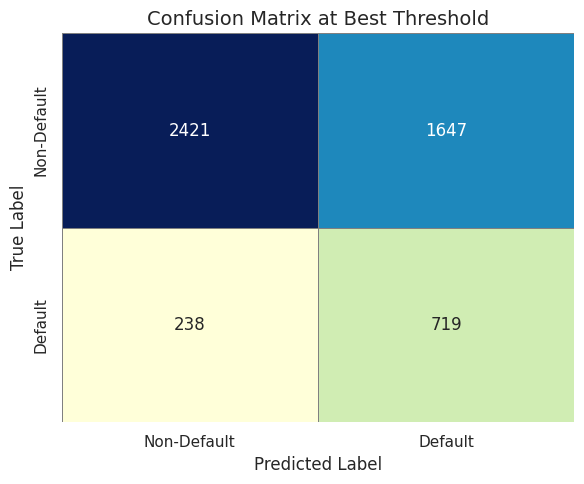

In [ ]:
# Predicted probabilities from model
y_probs = final_model_lightgbm.predict_proba(X_test)[:, 1]

# Find and visualize
best_threshold = find_best_threshold_and_plot_cm(y_test, y_probs)


#Logistic Regression

In [ ]:
# Objective function for Optuna
def objective_logistic(trial):
    params = {
        'C': trial.suggest_float('C', 1e-4, 10.0, log=True),
        'penalty': trial.suggest_categorical('penalty', ['l2']),
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'saga']),
        'max_iter': 1000,
        'random_state': 42
    }

    model = LogisticRegression(**params)
    f2_scorer = make_scorer(fbeta_score, beta=2)
    score = cross_val_score(model, X_train_smote, y_train_smote, scoring=f2_scorer, cv=3, n_jobs=-1).mean()
    return score

# Run the Optuna study
study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective_logistic, n_trials=15)

# Best hyperparameters and F2 score
print("Best Logistic Regression Parameters:", study_logistic.best_params)
print("Best F2 Score:", study_logistic.best_value)

# Train the final logistic regression model
model_logistic = LogisticRegression(**study_logistic.best_params, max_iter=1000, random_state=42)
model_logistic.fit(X_train_smote, y_train_smote)

[I 2025-06-15 16:56:17,679] A new study created in memory with name: no-name-9b70ab52-7017-4800-9f84-a3dd7506d8b4
[I 2025-06-15 16:56:22,660] Trial 0 finished with value: 0.6597581193317548 and parameters: {'C': 0.14644809893226618, 'penalty': 'l2', 'solver': 'lbfgs'}. Best is trial 0 with value: 0.6597581193317548.
[I 2025-06-15 16:56:23,120] Trial 1 finished with value: 0.6575985375273484 and parameters: {'C': 0.016438068755766682, 'penalty': 'l2', 'solver': 'lbfgs'}. Best is trial 0 with value: 0.6597581193317548.
[I 2025-06-15 16:56:49,452] Trial 2 finished with value: 0.659978058163251 and parameters: {'C': 0.24941746090362116, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 2 with value: 0.659978058163251.
[I 2025-06-15 16:56:59,823] Trial 3 finished with value: 0.659234946804584 and parameters: {'C': 0.09055935051470664, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 2 with value: 0.659978058163251.
[I 2025-06-15 16:57:00,256] Trial 4 finished with value: 0.6564940330585339

Best Logistic Regression Parameters: {'C': 4.833485017294244, 'penalty': 'l2', 'solver': 'saga'}
Best F2 Score: 0.6601465626211601


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=4.833485017294244, max_iter=1000, random_state=42,
                   solver='saga')

In [ ]:
# Predictions and Evaluation
y_pred = model_logistic.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')

# Output metrics
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F2 Score: {f2:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7383
Precision: 0.7940
Recall: 0.7383
F2 Score: 0.7439

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      4068
           1       0.38      0.60      0.47       957

    accuracy                           0.74      5025
   macro avg       0.64      0.69      0.65      5025
weighted avg       0.79      0.74      0.76      5025



#Random Forest Classifier

In [ ]:
def objective_rf(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 4, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "random_state": 42
    }

    model = RandomForestClassifier(**params)
    f2_scorer = make_scorer(fbeta_score, beta=2)
    cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_smote, y_train_smote, scoring=f2_scorer, cv=cv, n_jobs=-1).mean()
    return score

In [ ]:
# Run the Optuna study
study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_rf, n_trials=15)

[I 2025-06-15 17:15:38,536] A new study created in memory with name: no-name-2cf6f4b2-facf-40e0-994f-2ea934d15719
[I 2025-06-15 17:15:52,152] Trial 0 finished with value: 0.6645927471172348 and parameters: {'n_estimators': 167, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.6645927471172348.
[I 2025-06-15 17:16:02,906] Trial 1 finished with value: 0.8143990068884481 and parameters: {'n_estimators': 103, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 1 with value: 0.8143990068884481.
[I 2025-06-15 17:16:07,175] Trial 2 finished with value: 0.6657831438667079 and parameters: {'n_estimators': 93, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.8143990068884481.
[I 2025-06-15 17:16:40,967] Trial 3 finished with value: 0.8028337818955245 and

In [ ]:
print("Best Random Forest Parameters:", study_rf.best_params)
print("Best F2 Score from CV:", study_rf.best_value)

# Train the final model on best params
model_rf = RandomForestClassifier(**study_rf.best_params, random_state=42)
model_rf.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred = model_rf.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F2 Score: {f2:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Random Forest Parameters: {'n_estimators': 295, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}
Best F2 Score from CV: 0.8497169809607938

Accuracy: 0.8123
Precision: 0.8050
Recall: 0.8123
F2 Score: 0.8106

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89      4068
           1       0.51      0.45      0.48       957

    accuracy                           0.81      5025
   macro avg       0.69      0.68      0.68      5025
weighted avg       0.80      0.81      0.81      5025



#Comparing Models performance and plotting ROC Curve

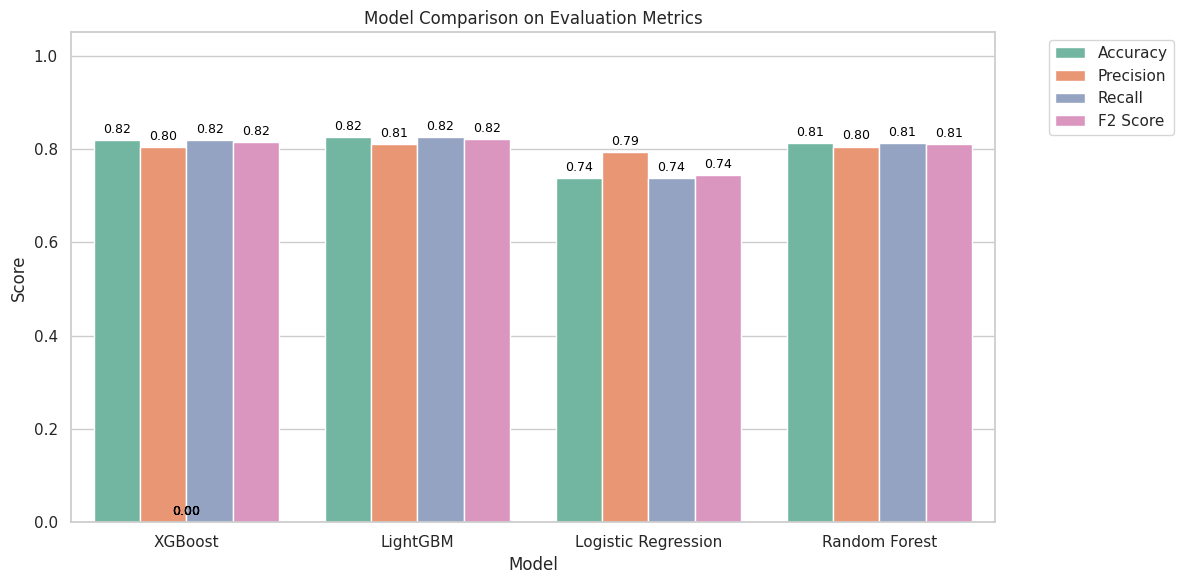

In [ ]:
# Metrics dictionary
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F2 Score": []
}

# Models dictionary
models = {
    "XGBoost": model_xgb,
    "LightGBM": final_model_lightgbm,
    "Logistic Regression": model_logistic,
    "Random Forest": model_rf
}

# Calculate metrics
for name, model in models.items():
    y_pred = model.predict(X_test)
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred, average='weighted'))
    metrics["Recall"].append(recall_score(y_test, y_pred, average='weighted'))
    metrics["F2 Score"].append(fbeta_score(y_test, y_pred, beta=2, average='weighted'))

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)
metrics_long = pd.melt(metrics_df, id_vars="Model", var_name="Metric", value_name="Score")

# Plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
barplot = sns.barplot(x="Model", y="Score", hue="Metric", data=metrics_long, palette="Set2")

# Add score labels on top of each bar
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                     textcoords='offset points')

plt.title("Model Comparison on Evaluation Metrics")
plt.ylim(0, 1.05)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

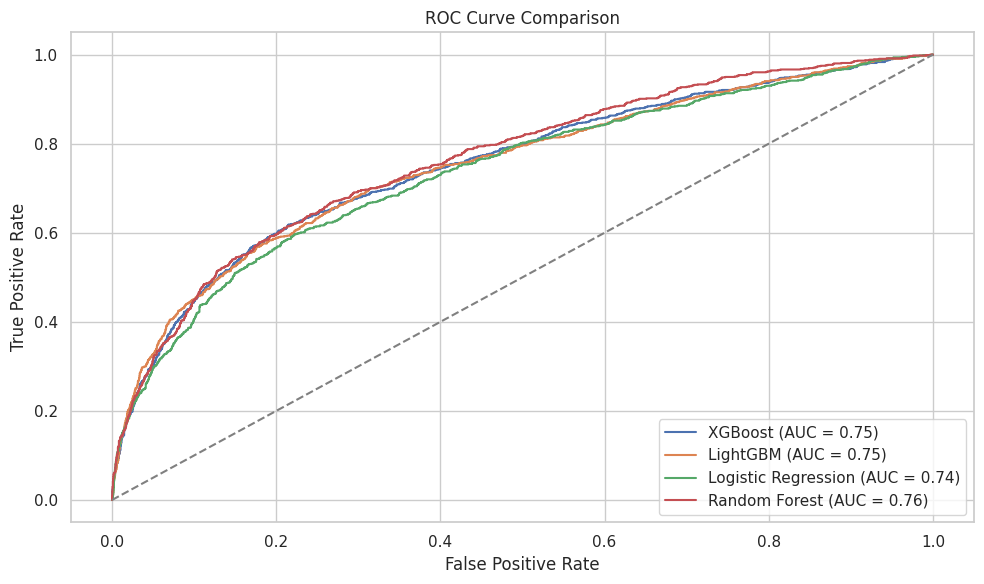

In [ ]:
from sklearn.metrics import roc_curve, auc
# Define models in a dictionary
models = {
    "XGBoost": model_xgb,
    "LightGBM": final_model_lightgbm,
    "Logistic Regression": model_logistic,
    "Random Forest": model_rf
}

plt.figure(figsize=(10, 6))

# Loop through models and plot ROC
for name, model in models.items():
    # Get predicted probabilities for the positive class
    y_proba = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot chance line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


From the above models i found that lightgbm is the best model as its f2 score is highest along with this its accuracy and AUC is also best as compared to other models(Xgb Classifier,logistic Regression,Random Forest Classifier)

so I select this model for Prediction

#Prediction on the validation data set

In [ ]:
val=pd.read_csv('/content/validate_dataset_final.csv')

In [ ]:
val.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32,0,0,0,0,...,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,2,0,1,350000,35,-1,-1,-1,0,...,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,3,2,1,1,310000,39,0,0,0,0,...,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,4,1,0,2,20000,47,0,0,0,2,...,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,5,2,1,2,500000,30,0,0,0,0,...,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23


In [ ]:
val= val.drop(["Customer_ID"],axis=1) # since in the assesment the ID column is not needed I drop it

In [ ]:
val = val.rename(columns={'pay_0': 'pay_1'})

In [ ]:
val.rename(columns={
    'pay_1': 'PAY_SEPT', 'pay_2': 'PAY_AUG', 'pay_3': 'PAY_JUL',
    'pay_4': 'PAY_JUN', 'pay_5': 'PAY_MAY', 'pay_6': 'PAY_APR',

    'Bill_amt1': 'BILL_AMT_SEPT', 'Bill_amt2': 'BILL_AMT_AUG', 'Bill_amt3': 'BILL_AMT_JUL',
    'Bill_amt4': 'BILL_AMT_JUN', 'Bill_amt5': 'BILL_AMT_MAY', 'Bill_amt6': 'BILL_AMT_APR',

    'pay_amt1': 'PAY_AMT_SEPT', 'pay_amt2': 'PAY_AMT_AUG', 'pay_amt3': 'PAY_AMT_JUL',
    'pay_amt4': 'PAY_AMT_JUN', 'pay_amt5': 'PAY_AMT_MAY', 'pay_amt6': 'PAY_AMT_APR'
}, inplace=True)


In [ ]:
val['education'].value_counts()

,count
education,
2,2374
1,1796
3,760
5,54
4,20
6,10
0,2


In [ ]:
# necessary mapping is done to convert other categories to suitable ones
val["education"]=val["education"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})
val["marriage"]=val["marriage"].map({0:3,1:1,2:2,3:3})

In [ ]:
engineer_financial_features(val)

,marriage,sex,education,LIMIT_BAL,age,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,AVG_Bill_amt,PAY_TO_BILL_ratio,avg_bill_amt,credit_utilization_ratio,max_delinquency_streak
0,1,1,2,220000,32,0,0,0,0,0,...,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31,23456.343333,0.106620,0
1,2,0,1,350000,35,-1,-1,-1,0,0,...,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00,13660.160000,0.039029,0
2,2,1,1,310000,39,0,0,0,0,0,...,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04,258034.261667,0.832369,0
3,1,0,2,20000,47,0,0,0,2,2,...,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08,13333.243333,0.666662,3
4,2,1,2,500000,30,0,0,0,0,0,...,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23,77204.711667,0.154409,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,1,0,2,240000,51,0,0,0,0,0,...,3718.80,3797.93,3820.66,3949.01,3976.22,103737.83,0.04,103737.570000,0.432240,0
5012,1,1,3,60000,33,0,0,0,0,0,...,3000.32,1499.86,1499.82,1099.82,1100.18,41858.83,0.04,41858.303333,0.697638,0
5013,1,0,1,290000,36,1,-2,-1,-1,0,...,568.10,16165.93,1000.03,1000.05,1000.15,8481.17,0.39,8481.243333,0.029246,1
5014,1,1,2,120000,28,0,0,0,0,0,...,2999.75,5000.26,3000.13,2999.95,4000.04,84492.00,0.04,84491.898333,0.704099,0


In [ ]:
val.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'AVG_Bill_amt',
       'PAY_TO_BILL_ratio', 'avg_bill_amt', 'credit_utilization_ratio',
       'max_delinquency_streak'],
      dtype='object')

In [ ]:
exclude_cols = ['marriage', 'sex', 'education', 'PAY_SEPT',
                'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']


In [ ]:
# Columns to winsorize (using your renamed columns)
cols_to_winsorize = [
    'LIMIT_BAL', 'age',
    'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
    'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
    'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
    'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR'
]

# Create a copy of the DataFrame
val_winsorized = val.copy()

# Apply 1% winsorization to each column
for col in cols_to_winsorize:
    val_winsorized[col] = winsorize(val[col], limits=[0.01, 0.01])

# Verify the result
print("Original min/max vs Winsorized min/max:")
for col in cols_to_winsorize[:3]:  # Print first 3 columns for demonstration
    print(f"\n{col}:")
    print(f"Original: min={val[col].min():.2f}, max={val[col].max():.2f}")
    print(f"Winsorized: min={val_winsorized[col].min():.2f}, max={val_winsorized[col].max():.2f}")

Original min/max vs Winsorized min/max:

LIMIT_BAL:
Original: min=10000.00, max=800000.00
Winsorized: min=10000.00, max=500000.00

age:
Original: min=21.00, max=75.00
Winsorized: min=22.00, max=60.00

BILL_AMT_SEPT:
Original: min=0.00, max=746813.18
Winsorized: min=0.00, max=363190.87


In [ ]:
val_winsorized.head()

,marriage,sex,education,LIMIT_BAL,age,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,AVG_Bill_amt,PAY_TO_BILL_ratio,avg_bill_amt,credit_utilization_ratio,max_delinquency_streak
0,1,1,2,220000,32,0,0,0,0,0,...,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31,23456.343333,0.106620,0
1,2,0,1,350000,35,-1,-1,-1,0,0,...,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00,13660.160000,0.039029,0
2,2,1,1,310000,39,0,0,0,0,0,...,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04,258034.261667,0.832369,0
3,1,0,2,20000,47,0,0,0,2,2,...,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08,13333.243333,0.666662,3
4,2,1,2,500000,30,0,0,0,0,0,...,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23,77204.711667,0.154409,0


In [ ]:
# Create a copy to preserve original
val_scaled = val_winsorized.copy()

# Identify columns to scale
cols_to_scale = [col for col in val_winsorized.columns if col not in exclude_cols]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform only selected columns
val_scaled[cols_to_scale] = scaler.fit_transform(val_winsorized[cols_to_scale])

In [ ]:
val_scaled.head()

,marriage,sex,education,LIMIT_BAL,age,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,AVG_Bill_amt,PAY_TO_BILL_ratio,avg_bill_amt,credit_utilization_ratio,max_delinquency_streak
0,1,1,2,0.406510,-0.367920,0,0,0,0,0,...,-0.121832,-0.334749,-0.240796,-0.132590,2.512369,-0.346548,-0.007806,-0.347086,-0.765698,-0.520278
1,2,0,1,1.428157,-0.037622,-1,-1,-1,0,0,...,0.970146,-0.070370,-0.412714,-0.290625,2.088713,-0.496774,0.042456,-0.497326,-0.959972,-0.520278
2,2,1,1,1.113804,0.402776,0,0,0,0,0,...,0.456762,0.941056,0.538070,0.638253,0.529808,3.250811,-0.027473,3.250550,1.320306,-0.520278
3,1,0,2,-1.165256,1.283573,0,0,0,2,2,...,-0.228657,-0.478719,-0.289478,-0.462974,-0.328501,-0.501789,-0.024560,-0.502340,0.844020,1.530847
4,2,1,2,2.606982,-0.588119,0,0,0,0,0,...,3.358263,0.284078,0.447046,0.510612,0.720544,0.477705,-0.013633,0.477233,-0.628337,-0.520278


In [ ]:
columns_to_drop=['BILL_AMT_MAY', 'BILL_AMT_APR']
val = val_scaled.drop(columns=columns_to_drop)

In [ ]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   marriage                  5016 non-null   int64  
 1   sex                       5016 non-null   int64  
 2   education                 5016 non-null   int64  
 3   LIMIT_BAL                 5016 non-null   float64
 4   age                       5016 non-null   float64
 5   PAY_SEPT                  5016 non-null   int64  
 6   PAY_AUG                   5016 non-null   int64  
 7   PAY_JUL                   5016 non-null   int64  
 8   PAY_JUN                   5016 non-null   int64  
 9   PAY_MAY                   5016 non-null   int64  
 10  PAY_APR                   5016 non-null   int64  
 11  BILL_AMT_SEPT             5016 non-null   float64
 12  BILL_AMT_AUG              5016 non-null   float64
 13  BILL_AMT_JUL              5016 non-null   float64
 14  BILL_AMT

In [ ]:
val_customerid=pd.read_csv('/content/validate_dataset_final.csv')

In [ ]:
val_preds = final_model_lightgbm.predict(val)

# Create DataFrame with only required columns
results_df = pd.DataFrame({
    'Customer_ID': val_customerid['Customer_ID'],
    'next_month_default': val_preds
})

# Save to CSV
results_df.to_csv('default_predictions.csv', index=False)

print("Predictions saved to 'default_predictions.csv'")

Predictions saved to 'default_predictions.csv'


In [ ]:
val_preds.shape

(5016,)